#PROYECTO: Análisis de Ventas de Combustibles Líquidos Para Vehículo Automotor, Desde 2018 Hasta 2022, en Estaciones de Servicio de Distintas Empresas Según Su Ubicación en  Argentina.

------------------------INICIO DE PROYECTO (1era parte)----------------------------------

1.	Generar preguntas o hipótesis de interés sobre el dataset elegido para el proyecto final.
2.	Crear gráficos que usen al menos tres variables y hacer un diagnóstico de lo que los mismos nos están diciendo.
3.	Vincular los gráficos y análisis numéricos hechos hasta el momento con las preguntas de interés.
4.	Identificar valores perdidos.

##ABSTRACT

El presente trabajo tiene como objetivo realizar un análisis de datos recolectados a partir de 2018 hasta el 2022, en estaciones de servicio ubicadas en Argentina; para ello se cuenta con un set de datos obtenidos de la Secretaría de Energía desde la página oficial https://datos.gob.ar/dataset. Dichos datos se centran en variables claves como precios, volúmenes de ventas, tipo de combustible, geolocalización y características específicas de las empresas que surten a las estaciones de servicio.
Este proyecto permitirá comprender mejor las complejidades del mercado de combustibles, proporcionando información valiosa para la optimización de operaciones, toma de decisiones y una comprensión más profunda de los factores que afectan los precios y volúmenes de venta en estaciones de servicio específicas de diferentes regiones de Argentina.
Esto se logrará a través de un enfoque descriptivo que utiliza estadísticas y visualizaciones, un enfoque diagnóstico que busca identificar factores influyentes y patrones regionales.
Una futura combinación de este análisis con un enfoque predictivo (modelos para prever tendencias futuras), y un enfoque prescriptivo (proponer recomendaciones y estrategias para optimizar precios y volúmenes de ventas), proporcionará una visión completa y accionable del mercado de combustibles en Argentina.



##HIPÓTESIS

Se postula que existe una relación proporcional entre los precios de los combustibles, la geolocalización de las estaciones de servicio y los volúmenes de ventas. A través de un análisis detallado, se busca confirmar o refutar esta hipótesis, identificando factores clave que influyen en la dinámica del mercado de combustibles en Argentina.

##GLOSARIO

###Descripción de tablas y columnas
**EstaciónServicio**: Es la tabla que contiene detalles del punto de venta de combustible:
texto en negrita

•	NroInscrip (PK): Número que corresponde a un identificador único formado por la unión del número de inscripción del establecimiento junto a un número entero ascendente comenzando desde el uno, separados con una barra baja.

•	Nro_Inscripcion: Número que identifica al establecimiento donde se abastece el combustible líquido en las distintas zonas geográficas.

•	Operador: Se refiere a la empresa responsable del funcionamiento comercial, técnico y operativo de la estación de servicio.

•	Bandera: Se refiere a la marca del proveedor del combustible.

•	Id_direccion (FK): Es un dato foráneo que se obtiene de la tabla “Ubicación”. Consta de un identificador único relacionado a la estación de servicio.


**Combustible**: Esta tabla contiene detalles de la identificación del tipo de combustible líquido.

•	CombustibleID (PK): Es el identificador que distingue a cada combustible líquido.

•	Combustible_Tipo: Es el número asignado como identificador de cada tipo de combustible.
•	Producto: Corresponde al nombre del tipo de combustible abastecido.



**Abastecimiento**: Pertenece a la tabla que contiene las fechas y el costo del combustible según la cantidad abastecida. Relaciona a la tabla “EstacionDeServicio” con la tabla “Combustible”, por lo que tiene como claves foráneas, las identidades únicas de las estaciones de servicio y las del combustible.

•	NroInscrip_IdCombust (PK): Corresponde a una identificación que se generó combinando al identificador de cada combustible con el de la estación de servicio, separados por una barra diagonal.

•	NroInscrip (FK): Es la identificación de la estación de servicio donde se abastece el combustible.

•	CombustibleID (FK): Es el identificador del combustible líquido abastecido.

•	Anio: Corresponde al número entero que representa al año de la fecha en la cual se abasteció al combustible en una determinada estación de servicio, en una determinada zona geográfica.

•	Mes: Corresponde al número entero que representa al mes de la fecha en la cual se abasteció al combustible en una determinada estación de servicio de una ubicación específica.

•	Volumen: Corresponde a la cantidad, medida en metros cúbicos (1m3= 1000Litros), del combustible líquido especifico abastecido en una determinada fecha y en una determinada estación de servicio.

•	Precio: Corresponde al número, que puede ser entero o decimal, que representa al costo del volumen de combustible líquido específico abastecido en una determinada estación de servicio de una ubicación específica.

•	Fecha: Se refiere al mes y al año en la cual se abasteció al combustible.


**Ubicación**: Esta tabla permite geolocalizar la zona geográfica específica en la que se encuentra cada estación de servicio en la que se abastece combustible, según sus coordenadas geográficas, provincia, localidad y detalles concretos de su dirección.

•	Id_direccion (PK): Es un dato que consta de un identificador único formado por un número entero ascendente, desde el 1, junto a la ubicación del establecimiento donde opera la estación de servicio, separados por una barra baja.

•	Direccion: Son los detalles específicos (avenida, calle, ruta, entre otros) que describen y distinguen al lugar específico donde se encuentra una determinada estación de servicio de una localidad Argentina.

•	Localidad: Corresponde al nombre de la localidad, perteneciente a una determinada provincia Argentina, donde se encuentra una estación de servicio específica.

•	Provincia: Representa el nombre de la provincia Argentina, donde se ubica una estación de abastecimiento de combustible específica.

•	Latitud: Corresponde a la coordenada geográfica medida desde el ecuador hasta el paralelo donde se encuentra la estación de servicio. Todos los número son negativos porque se refieren a un punto en el hemisferio Sur, que es donde se ubica Argentina. Pueden ser números enteros o decimales, puesto que si el número es muy grande, va a estar representado en notación exponencial.    

•	Longitud: Corresponde a la coordenada geográfica medida desde el Meridiano 0° hasta el meridiano donde se encuentra la estación de servicio. Todos los número son negativos porque se refieren a un punto en el hemisferio Oeste, que es donde se ubica Argentina. Pueden ser números enteros o decimales, puesto que si el número es muy grande, va a estar representado en notación exponencial.


In [2]:
#Importar las librerias
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() #sobreescribe los parámetros internos de matplotlib para que utilice el estilo de Seaborn.
          #Los gráficos posteriores que realice tendrán un mejor aspecto.
#Carga de tablas
df_EstacionServicio = pd.read_csv('/content/drive/MyDrive/Tablas _DataScience1/EstacionServicio.csv', encoding='latin1', delimiter=';')
#df_ = pd.read_csv('/content/drive/MyDrive/Tablas recuperatorio primer parcial-20240524/orders')
df_Combustible = pd.read_csv('/content/drive/MyDrive/Tablas _DataScience1/Combustible.csv', encoding='latin1', delimiter=';')
df_Ubicacion = pd.read_csv('/content/drive/MyDrive/Tablas _DataScience1/Ubicacion.csv', encoding='latin1', delimiter=';')
df_Abastecimiento = pd.read_csv('/content/drive/MyDrive/Tablas _DataScience1/Abastecimiento.csv', encoding='latin1', delimiter=';')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


EXPLORACIÓN DE LAS TABLAS:

In [50]:
df_EstacionServicio #Para habilitar la forma, descripción o información de la tabla, quite el "#" para realizar la observación pertinente
#df_EstacionServicio.shape
#df_EstacionServicio.describe().round(2)
#df_EstacionServicio.info()


,NroInscrip (PK),Nro_Inscripcion,Operador,Bandera,Id_direccion (FK)
0,104_1,104,CALCAGNO RICARDO OMAR Y CALCAGNO RICARDO JAVIE...,SHELL C.A.P.S.A.,1_AV. 25 DE MAYO 280
1,104_2,104,CALCAGNO RICARDO OMAR Y CALCAGNO RICARDO JAVIE...,SHELL C.A.P.S.A.,2_AV. 25 DE MAYO 280
2,104_3,104,CALCAGNO RICARDO OMAR Y CALCAGNO RICARDO JAVIE...,SHELL C.A.P.S.A.,3_AV. 25 DE MAYO 280
3,104_4,104,CALCAGNO RICARDO OMAR Y CALCAGNO RICARDO JAVIE...,SHELL C.A.P.S.A.,4_AV. 25 DE MAYO 280
4,107_5,107,MACHAGAI COMBUSTIBLES SRL,YPF,5_M.MORENO Y 25 DE MAYO
...,...,...,...,...,...
813895,10348_813896,10348,FRAN SA,SHELL C.A.P.S.A.,813896_AV GUTNISKY 3396
813896,10490_813897,10490,ENERGY COMBUSTIBLES S.R.L.,SHELL C.A.P.S.A.,813897_BV. COLON 2290
813897,10490_813898,10490,ENERGY COMBUSTIBLES S.R.L.,SHELL C.A.P.S.A.,813898_BV. COLON 2290
813898,10490_813899,10490,ENERGY COMBUSTIBLES S.R.L.,SHELL C.A.P.S.A.,813899_BV. COLON 2290


La tabla EstacionServicio, tiene 813900 entradas o registros y 5 features o variables.

In [ ]:
df_Combustible #Para habilitar la forma, descripción o información de la tabla, quite el "#" para realizar la observación pertinente
#df_Combustible.shape
#df_Combustible.describe().round(2)
#df_Combustible.info()

,CombustibleID (PK),Combustible_Tipo,Producto,Unnamed: 3,
0,1_1,1,Gas Oil Grado 2,NaN,NaN
1,2_2,2,Nafta (premium) de más de 95 Ron,NaN,NaN
2,3_3,3,Nafta (súper) entre 92 y 95 Ron,NaN,NaN
3,4_4,4,Gas Oil Grado 3,NaN,NaN
4,5_3,3,Nafta (súper) entre 92 y 95 Ron,NaN,NaN
...,...,...,...,...,...
813895,813896_1,1,Gas Oil Grado 2,NaN,NaN
813896,813897_1,1,Gas Oil Grado 2,NaN,NaN
813897,813898_3,3,Nafta (súper) entre 92 y 95 Ron,NaN,NaN
813898,813899_2,2,Nafta (premium) de más de 95 Ron,NaN,NaN


In [ ]:
df_Ubicacion#Para habilitar la forma, descripción o información de la tabla, quite el "#" para realizar la observación pertinente
#df_Ubicacion.shape
#df_Ubicacion.describe().round(2)
#df_Ubicacion.info()

,Id_direccion (PK),Direccion,Localidad,Provincia,Latitud,Longitud
0,1_AV. 25 DE MAYO 280,AV. 25 DE MAYO 280,RESISTENCIA,CHACO,-27448803,"-5898882,00"
1,2_AV. 25 DE MAYO 280,AV. 25 DE MAYO 280,RESISTENCIA,CHACO,-27448803,"-5898882,00"
2,3_AV. 25 DE MAYO 280,AV. 25 DE MAYO 280,RESISTENCIA,CHACO,-27448803,"-5898882,00"
3,4_AV. 25 DE MAYO 280,AV. 25 DE MAYO 280,RESISTENCIA,CHACO,-27448803,"-5898882,00"
4,5_M.MORENO Y 25 DE MAYO,M.MORENO Y 25 DE MAYO,MACHAGAY,CHACO,-269247,"-6004693,00"
...,...,...,...,...,...,...
813895,813896_AV GUTNISKY 3396,AV GUTNISKY 3396,FORMOSA,FORMOSA,-2619418,"-5820045,00"
813896,813897_BV. COLON 2290,BV. COLON 2290,CASILDA,SANTA FE,-330549044,"-611608868,00"
813897,813898_BV. COLON 2290,BV. COLON 2290,CASILDA,SANTA FE,-330549044,"-611608868,00"
813898,813899_BV. COLON 2290,BV. COLON 2290,CASILDA,SANTA FE,-330549044,"-611608868,00"


In [ ]:
df_Abastecimiento#Para habilitar la forma, descripción o información de la tabla, quite el "#" para realizar la observación pertinente
#df_Ubicacion.shape
#df_Ubicacion.describe().round(2)
#df_Ubicacion.info()

,NroInscrip_IdCombust (PK),NroInscrip (FK),CombustibleID (FK),Anio,Mes,Volumen,Precio,Fecha
0,104_1/1_1,104_1,1_1,2018,1,31762.00,230998.0,2018/1
1,104_2/2_2,104_2,2_2,2018,1,130145.00,305659.0,2018/1
2,104_3/3_3,104_3,3_3,2018,1,193071.00,183275.0,2018/1
3,104_4/4_4,104_4,4_4,2018,1,65499.00,27052.0,2018/1
4,107_5/5_3,107_5,5_3,2018,1,277.03,265309.0,2018/1
...,...,...,...,...,...,...,...,...
813895,10348_813896/813896_1,10348_813896,813896_1,2022,6,76.08,143313.0,2022/6
813896,10490_813897/813897_1,10490_813897,813897_1,2022,6,17.03,162372.0,2022/6
813897,10490_813898/813898_3,10490_813898,813898_3,2022,6,10.23,134.9,2022/6
813898,10490_813899/813899_2,10490_813899,813899_2,2022,6,3.91,163.4,2022/6


LIMPIEZA DE LOS DATOS

In [5]:
#Eliminar columnas finales de la tabla "Combustible", que están sin datos
#df_Combustible_clean = df_Combustible.loc[:, ~df_Combustible.columns.str.contains('^Unnamed')]
df_Combustible = df_Combustible.drop(columns=df_Combustible.columns[-2:])
print(df_Combustible.head())
print(df_Combustible.shape)

  CombustibleID (PK)
0                1_1
1                2_2
2                3_3
3                4_4
4                5_3
(813900, 1)


In [6]:
#Transformar datos de string a tipo fecha, en la columna"Fecha" de la Tabla "Abastecimiento"
df_Abastecimiento['Fecha'] = pd.to_datetime(df_Abastecimiento['Fecha'], format='%Y/%m')

# Verificar la estructura de df_Abastecimiento después de la conversión
df_Abastecimiento.head()
#print(df_Abastecimiento.dtypes)

,NroInscrip_IdCombust (PK),NroInscrip (FK),CombustibleID (FK),Anio,Mes,Volumen,Precio,Fecha
0,104_1/1_1,104_1,1_1,2018,1,31762.00,230998.0,2018-01-01
1,104_2/2_2,104_2,2_2,2018,1,130145.00,305659.0,2018-01-01
2,104_3/3_3,104_3,3_3,2018,1,193071.00,183275.0,2018-01-01
3,104_4/4_4,104_4,4_4,2018,1,65499.00,27052.0,2018-01-01
4,107_5/5_3,107_5,5_3,2018,1,277.03,265309.0,2018-01-01


In [7]:
# Renombrar columnas que contienen '(FK)' y '(PK)'en su nombre

df_Combustible = df_Combustible.rename(columns={'CombustibleID (PK)': 'CombustibleID'})

df_Abastecimiento = df_Abastecimiento.rename(columns={'NroInscrip_IdCombust (PK)':'NroInscrip_IdCombust',	'NroInscrip (FK)': 'NroInscrip', 'CombustibleID (FK)': 'CombustibleID'})

df_EstacionServicio = df_EstacionServicio.rename(columns={'NroInscrip (PK)': 'NroInscrip', 'Id_direccion (FK)': 'Id_direccion'})

df_Ubicacion = df_Ubicacion.rename(columns={'Id_direccion (PK)': 'Id_direccion'})

df_Combustible

,CombustibleID
0,1_1
1,2_2
2,3_3
3,4_4
4,5_3
...,...
813895,813896_1
813896,813897_1
813897,813898_3
813898,813899_2


REDUCCIÓN DEL TIEMPO DE EJECUCIÓN

Cada tabla tiene 813.900 regisros. Se hace necario reducir la cantidad de datos, para la visualizacion del codigo y acelerar la ejecución del código, para ello se realiza un muestreo estadísticamente representativo. Una manera de hacerlo es usando la función sample de pandas para tomar una muestra aleatoria de los datos.


In [78]:
# Configurar la semilla para reproducibilidad
seed = 42

# Definir el porcentaje de muestreo (0.1% de los datos originales)
sampling_fraction = 0.001

# Reducir la cantidad de datos en cada DataFrame

# Tomar una muestra del 0.1% de cada DataFrame
df_EstacionServicio_sample = df_EstacionServicio.sample(frac=sampling_fraction, random_state=seed)
df_Combustible_sample = df_Combustible.sample(frac=sampling_fraction, random_state=seed)
df_Ubicacion_sample = df_Ubicacion.sample(frac=sampling_fraction, random_state=seed)
df_Abastecimiento_sample = df_Abastecimiento.sample(frac=sampling_fraction, random_state=seed)

# Verificar la cantidad de registros en cada muestra
print("df_EstacionServicio_sample:", len(df_EstacionServicio_sample))
print("df_Combustible_sample:", len(df_Combustible_sample))
print("df_Ubicacion_sample:", len(df_Ubicacion_sample))
print("df_Abastecimiento_sample:", len(df_Abastecimiento_sample))


#¿Por qué se usa una semilla?
# """El 42 en este contexto es un valor numérico que se utiliza como "semilla" para un generador de números aleatorios.
# Los generadores de números aleatorios (RNG) en realidad no producen números completamente aleatorios. En su lugar, utilizan algoritmos para generar secuencias de números que parecen aleatorios. La semilla es un valor inicial que "inicia" el algoritmo.

# ¿Qué hace el 42?
# Cuando estableces la semilla en 42, le dices al generador de números aleatorios que comience su secuencia usando ese valor específico. Esto significa que cada vez que ejecutes el código con la semilla 42, el generador generará la misma secuencia de números "aleatorios".

# ¿Por qué es importante?
# Esto es útil para la reproducibilidad. Si estás trabajando en un proyecto que involucra generación de números aleatorios, es importante poder obtener los mismos resultados cada vez que ejecutas el código. Esto te ayuda a depurar tu código, reproducir resultados para análisis y compartir tu trabajo con otros.

# En resumen: El 42, o el número escogido, es simplemente un número que se utiliza para configurar el generador de números aleatorios y asegurar la reproducibilidad de los resultados.
# Se puede elegir cualquier número, pero 42 es un valor comúnmente usado por convención."""

df_EstacionServicio_sample: 814
df_Combustible_sample: 814
df_Ubicacion_sample: 814
df_Abastecimiento_sample: 814


* Medir la variación mensual de precios, establecer correlaciones significativas entre precios y volúmenes de venta según la estación de servicio y la marca de combustible, y visualizar geoespacialmente la distribución de estaciones de servicio en relación con sus características y desempeño económico.



1. Variación mensual de precios

Primero, vamos a crear un gráfico de líneas para visualizar la variación mensual de precios desde 2018 hasta 2022.

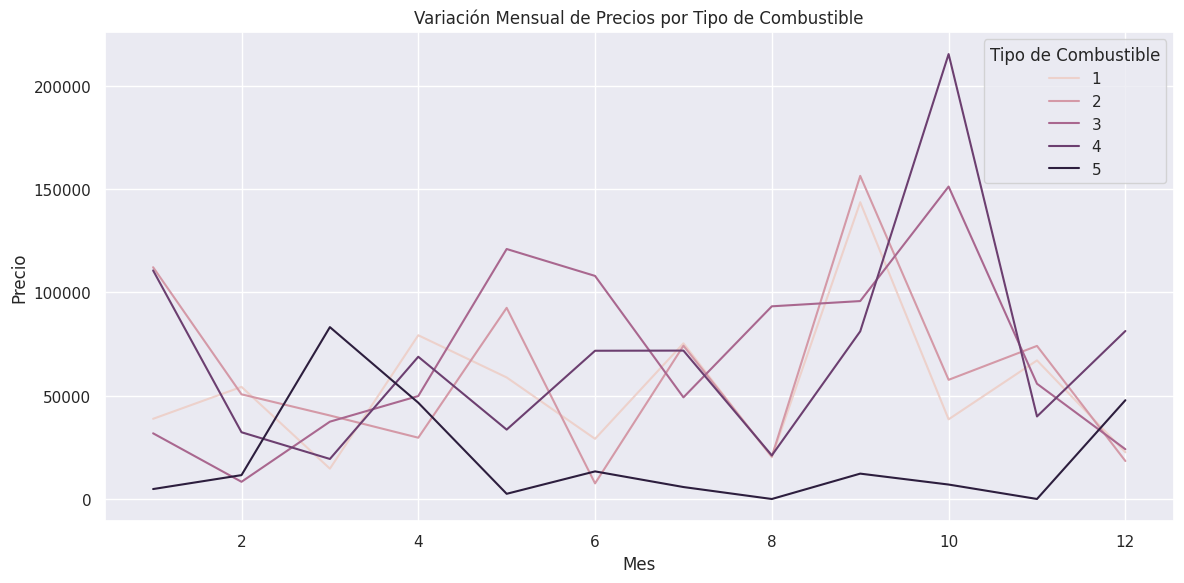

In [79]:
# Unir la tabla de abastecimiento con la tabla de combustible utilizando la columna 'CombustibleID'
df_merged = df_Abastecimiento_sample.merge(df_Combustible_sample, on='CombustibleID', how='left')

# Verificar las primeras filas del DataFrame resultante para asegurarse de que la unión se haya realizado correctamente
df_merged.head()

# Extraer el mes y el año de la columna 'Fecha'
df_merged['Mes'] = df_merged['Fecha'].dt.month
df_merged['Año'] = df_merged['Fecha'].dt.year

# Agrupar por mes, año y tipo de combustible, y calcular el precio medio
df_grouped = df_merged.groupby(['Año', 'Mes', 'Combustible_Tipo'])['Precio'].mean().reset_index()

# Graficar la variación mensual de precios según el tipo de combustible
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_grouped, x='Mes', y='Precio', hue='Combustible_Tipo', errorbar=None)
plt.title('Variación Mensual de Precios por Tipo de Combustible')
plt.xlabel('Mes')
plt.ylabel('Precio')
plt.legend(title='Tipo de Combustible')
plt.grid(True)
plt.tight_layout()
plt.show()

Interpretación: Este gráfico muestra cómo varían los precios mensuales según el tipo de combustible. Observándose que es muy variable la relación de los precios de combustibles y según el tipo, aunque puede notarse un pico de aumento del precio para el tipo 3 y 4 en el mes 10 y una caida en el mes siguiente. Por lo que se tendría que profundizar más en lo que pasó en esa fecha en la economía del país.  
 Tipo de combustibles:
  1-Gas Oil Grado 2
  2-Nafta (premium) de más de 95 Ron
  3-Nafta (súper) entre 92 y 95 Ron
  4-Gas Oil Grado 3
  5-GNC” (Gas Natural Comprimido)
Tendencia general: Todos los tipos de combustible muestran una tendencia general alcista, es decir, los precios de todos los combustibles tienden a aumentar con el tiempo. Esto puede deberse a factores como la inflación, el aumento de los costos de producción o la demanda creciente.

Diferencias entre tipos de combustibles: La variación de precios entre los distintos combustibles es considerable. El "Gas Oil Grado 2" (número 1) y el "Gas Oil Grado 3" (número 4) muestran los precios más altos y también las mayores variaciones de precio. La "Nafta (premium) de más de 95 Ron" (número 2) y la "Nafta (súper) entre 92 y 95 Ron" (número 3) tienen precios más estables y variaciones de precio menos pronunciadas. El "GNC" (Gas Natural Comprimido) (número 5) tiene los precios más bajos y las variaciones de precio más moderadas.

Estacionalidad: No se aprecia una estacionalidad clara en la variación de precios. La mayoría de los combustibles muestran una tendencia alcista constante, sin una fluctuación significativa entre meses.

Posibles factores: Las variaciones de precios pueden estar influenciadas por varios factores, incluyendo:

Costos de producción: Los cambios en los costos de producción de los combustibles (como los precios del petróleo crudo, los costos de transporte o los impuestos) pueden afectar los precios finales.
Demanda: La demanda de combustible puede variar dependiendo de la época del año (por ejemplo, mayor demanda en verano) y de la actividad económica.
Regulaciones: Las políticas energéticas y las regulaciones gubernamentales pueden influir en los precios de los combustibles.
Mercado internacional: Los precios de los combustibles en el mercado internacional pueden influir en los precios locales.
Para analizar el gráfico con más profundidad se requiere información adicional:

Período de tiempo: Saber a qué años corresponde el gráfico permite contextualizar las variaciones de precios y comprender las causas.
Información adicional: Información adicional sobre el volumen de ventas, la producción, la política energética, la situación económica y las regulaciones del mercado energético en el país o región en cuestión, permitiría realizar un análisis más completo.
En resumen, el gráfico "Variación Mensual de Precios por Tipo de Combustible" muestra una tendencia general alcista en los precios de los combustibles, con diferencias significativas entre los distintos tipos. Es necesario contar con más información para realizar un análisis más profundo y comprender las causas de las variaciones de precios.

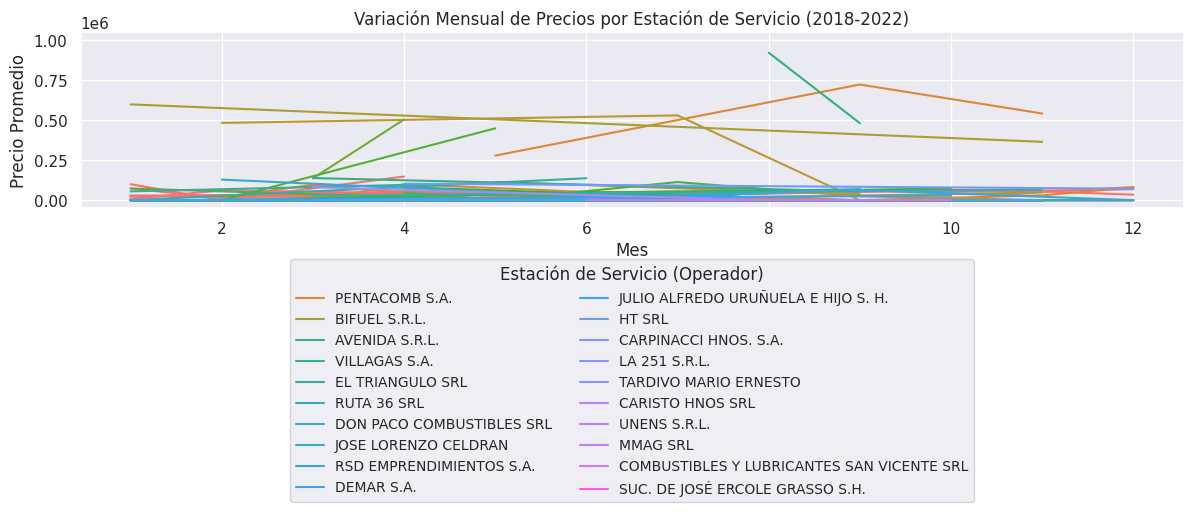

In [80]:
# Unir la tabla de abastecimiento con la tabla de estación de servicio utilizando la columna 'NroInscrip'
df_merged_station = df_Abastecimiento_sample.merge(df_EstacionServicio_sample, on='NroInscrip', how='left')

# Verificar las primeras filas del DataFrame resultante para asegurarse de que la unión se haya realizado correctamente
#print(df_merged_station.head())


# Agrupar por mes, año y estación de servicio, y calcular el precio medio
df_grouped_station = df_merged_station.groupby(['Anio', 'Mes', 'Operador'])['Precio'].mean().reset_index()

# Graficar la variación mensual de precios según la estación de servicio
plt.figure(figsize=(12, 6))
plot=sns.lineplot(data=df_grouped_station, x='Mes', y='Precio', hue='Operador', errorbar=None)
plt.title('Variación Mensual de Precios por Estación de Servicio (2018-2022)')
plt.xlabel('Mes')
plt.ylabel('Precio Promedio')
#plt.legend(title='Estación de Servicio', bbox_to_anchor=(0.5, 1), loc='upper left')
# Seleccionar las estaciones con los valores más altos de precios promedio (top 20, por ejemplo)
top_stations = df_grouped_station.nlargest(20, 'Precio')['Operador']

# Limitar la leyenda a las estaciones con los valores más altos de precios
handles, labels = plot.get_legend_handles_labels()
top_labels = [label for label in labels if label in top_stations.values]
top_handles = [handle for handle, label in zip(handles, labels) if label in top_stations.values]
# Colocar la leyenda debajo del gráfico y ajustar el tamaño de la fuente
plt.legend(top_handles, top_labels, title='Estación de Servicio (Operador)', bbox_to_anchor=(0.5, -0.25), loc='upper center', ncol=2, fontsize='small', title_fontsize='medium')
plt.grid(True)
plt.tight_layout()   #asegura que los elementos del gráfico no se solapen
plt.show()

Interpretación: Este gráfico muestra la tendencia de los precios de los combustibles a lo largo del tiempo según el operador. Se puede observar cómo los precios fluctúan mensualmente y si hay patrones estacionales o tendencias a largo plazo. En este caso se puede notar por ejemplo que la Estación de servicio BIFUEL S.R.L. es una de las que abastece el combustible más costosos y los ha mantenido constante en el tiempo. A diferencia de los otros más costosos que han disminuido el precio como PENTACOMB S.A. y AVENIDA S.R.L.
El gráfico muestra la variación mensual del precio del combustible durante el período 2018-2022, para diferentes estaciones de servicio. Se puede observar que:

Existen diferentes tendencias de precios entre las estaciones de servicio: Algunas mantienen precios relativamente estables a lo largo del tiempo (como "HT SRL", "CARPINACCI HNOS. S.A." y "UNENS S.R.L."), mientras que otras muestran variaciones más pronunciadas (como "SUC. DE JOSÉ ERCOLE GRASSO S.H." y "COMBUSTIBLES Y LUBRICANTES SAN VICENTE SRL").

La mayoría de las estaciones de servicio ajustan sus precios de forma similar: Aunque la magnitud de los cambios puede variar, la tendencia general en el precio del combustible es similar para la mayoría de las estaciones de servicio.

Se observa un comportamiento estacional en los precios: En general, se puede apreciar que los precios tienden a ser más altos durante los meses de verano (diciembre-febrero) y más bajos en los meses de otoño (mayo-agosto).

No hay un patrón claro de influencia de las estaciones de servicio en el mercado: No se puede observar una correlación directa entre el precio y el volumen de ventas de cada estación, lo que sugiere que otros factores (ubicación, tipo de combustible, estrategias de marketing, etc.) pueden estar jugando un papel más importante en la influencia de cada estación de servicio en el mercado.

Para un análisis más profundo, sería necesario tener acceso a datos adicionales como el volumen de ventas de cada estación y la información sobre las estrategias comerciales de cada una.

2. Correlación entre precios y volúmenes de venta
Para esto, usaremos un gráfico de dispersión (scatter plot) que nos ayudará a visualizar la relación entre los precios y los volúmenes de venta, diferenciando por la estación de servicio y la marca de combustible.

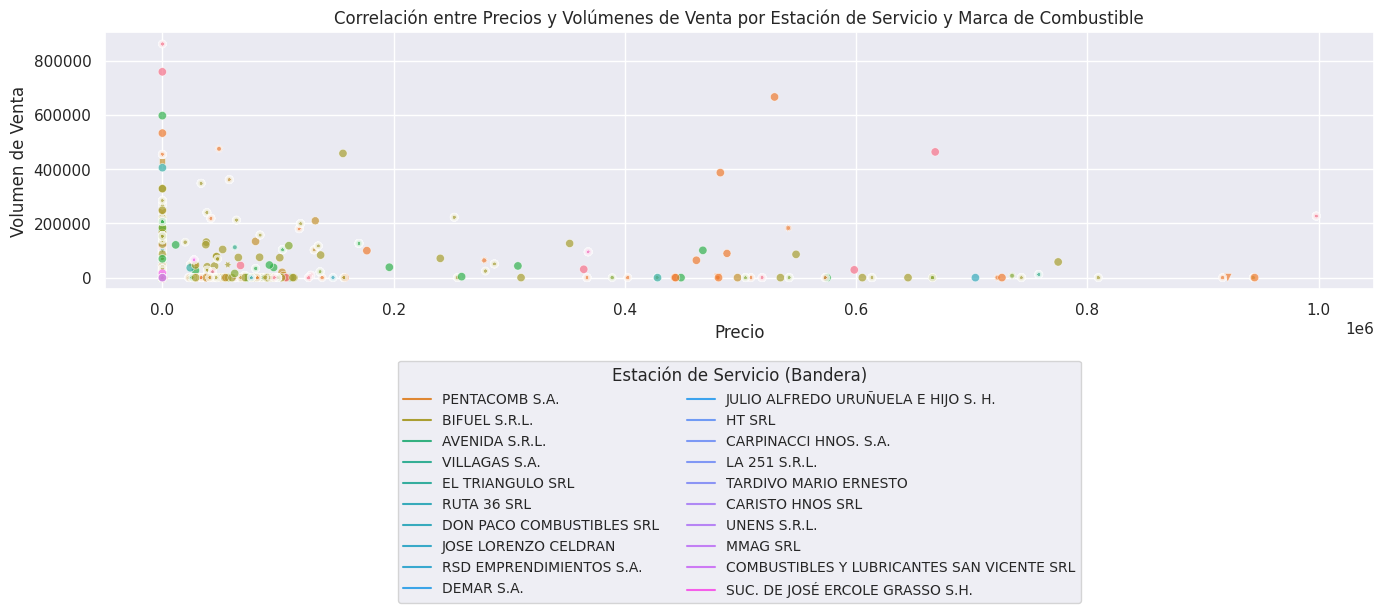

In [81]:
# Fusionar df_merged_station(df_Abastecimiento con df_EstacionServicio) con df_Combustible
df_merged_station_combustible = df_merged_station.merge(df_Combustible_sample, on='CombustibleID', how='left')

# Crear el gráfico de dispersión
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df_merged_station_combustible, x='Precio', y='Volumen', hue='Bandera', style='Operador', alpha=0.7)
plt.title('Correlación entre Precios y Volúmenes de Venta por Estación de Servicio y Marca de Combustible')
plt.xlabel('Precio')
plt.ylabel('Volumen de Venta')
# Limitar la leyenda a las estaciones con los valores más altos de precios
handles, labels = plot.get_legend_handles_labels()
top_labels = [label for label in labels if label in top_stations.values]
top_handles = [handle for handle, label in zip(handles, labels) if label in top_stations.values]
# Colocar la leyenda debajo del gráfico y ajustar el tamaño de la fuente
plt.legend(top_handles, top_labels, title='Estación de Servicio (Bandera)', bbox_to_anchor=(0.5, -0.25), loc='upper center', ncol=2, fontsize='small', title_fontsize='medium')
plt.tight_layout()
plt.show()

Interpretación: Este gráfico ayuda a identificar si hay una correlación significativa entre los precios y los volúmenes de venta. La diferenciación por estación de servicio y tipo de combustible puede mostrar si ciertas estaciones o combustibles tienen un comportamiento distinto.
El gráfico muestra la correlación entre los precios y los volúmenes de venta de combustible, agrupados por estación de servicio y marca de combustible. Se observa que hay una gran variabilidad en los precios y los volúmenes de venta, y que no existe una correlación clara entre ambas variables.

Las estaciones de servicio están representadas por colores distintos, y cada punto en el gráfico representa una combinación específica de precio y volumen de venta para una estación de servicio en particular.

Es importante destacar que la mayoría de los puntos se encuentran agrupados en la parte inferior izquierda del gráfico, lo que indica que la mayoría de las estaciones de servicio venden combustibles a precios relativamente bajos y con volúmenes de venta moderados.

Sin embargo, también se observa que hay algunas estaciones de servicio que venden combustibles a precios más altos, y que también tienen volúmenes de venta más altos. Esto sugiere que algunas estaciones de servicio pueden tener una mayor influencia en el mercado, ya sea por su ubicación estratégica o por la calidad de sus productos.

En general, el gráfico no muestra una relación clara entre los precios y los volúmenes de venta de combustible. Sin embargo, se puede observar que hay una gran variabilidad en ambos variables, y que algunas estaciones de servicio parecen tener una mayor influencia en el mercado que otras, lo que se evidencia por la cantidad de puntos que se agrupan cerca de los valores de precio y volumen de venta más altos.
Por ejemplo, podemos observar que las estaciones de servicio "SUC. DE JOSÉ ERCOLE GRASSO S.H." y "COMBUSTIBLES Y LUBRICANTES SAN VICENTE SRL" tienen puntos que se agrupan en el extremo superior derecho de la gráfica, lo que sugiere que estos puntos están vendiendo combustibles a un precio más alto y tienen volúmenes de venta más altos.

También podemos ver que "PENTACOMB S.A." tiene una cantidad considerable de puntos que se distribuyen entre los valores medios de precio y volumen de venta, lo que sugiere que esta estación de servicio tiene una presencia importante en el mercado.

Es importante tener en cuenta que esta es solo una interpretación preliminar, y para obtener una visión más precisa sobre la influencia de cada estación de servicio en el mercado, sería necesario realizar un análisis más profundo que incluya información adicional como la ubicación de las estaciones de servicio, el tipo de combustible que venden y la cantidad de clientes que atienden.

3. Distribución geoespacial de estaciones de servicio
Para visualizar la distribución geográfica de las estaciones de servicio, usaremos un gráfico de dispersión geoespacial.

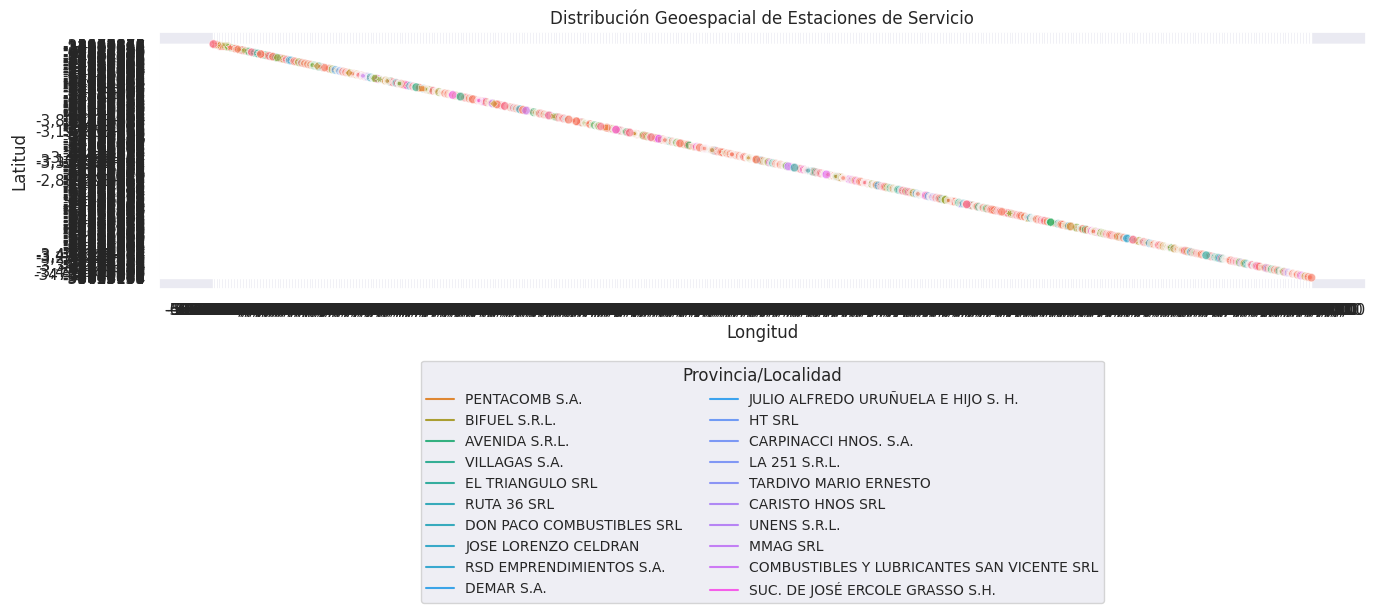

In [82]:
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df_Ubicacion_sample, x='Longitud', y='Latitud', hue='Provincia', style='Localidad', alpha=0.6)
plt.title('Distribución Geoespacial de Estaciones de Servicio')
plt.xlabel('Longitud')
plt.ylabel('Latitud')

# Limitar la leyenda a las estaciones con los valores más altos de precios
#handles, labels = plot.get_legend_handles_labels()
#top_labels = [label for label in labels if label in top_stations.values]
#top_handles = [handle for handle, label in zip(handles, labels) if label in top_stations.values]
# Colocar la leyenda debajo del gráfico y ajustar el tamaño de la fuente
plt.legend(top_handles, top_labels, title='Provincia/Localidad', bbox_to_anchor=(0.5, -0.25), loc='upper center', ncol=2, fontsize='small', title_fontsize='medium')
plt.tight_layout()
plt.grid(True)
plt.show()
#Puede funcionar este grafico limpiando la Latitud y la Longitud

Interpretación: Este gráfico muestra la distribución de las estaciones de servicio en diferentes localidades y provincias. Es útil para identificar concentraciones de estaciones y su relación con áreas geográficas específicas.
El gráfico muestra la distribución geográfica de estaciones de servicio en Argentina. Las estaciones de servicio se agrupan en una línea diagonal, lo que sugiere que se encuentran a lo largo de una carretera o ruta principal.

El gráfico se divide en dos ejes:

Latitud: El eje vertical representa la latitud, que indica la posición norte-sur de las estaciones de servicio. Las estaciones de servicio se encuentran en latitudes similares, lo que sugiere que están localizadas en una región geográfica relativamente pequeña.
Longitud: El eje horizontal representa la longitud, que indica la posición este-oeste de las estaciones de servicio. Las estaciones de servicio se encuentran a diferentes longitudes, lo que indica que están distribuidas a lo largo de una distancia considerable.
El gráfico también muestra la ubicación de las estaciones de servicio con respecto a las provincias y localidades donde se encuentran. Cada color representa una empresa o una provincia/localidad específica.

En general, el gráfico permite visualizar la distribución espacial de las estaciones de servicio en Argentina y la ubicación relativa de las diferentes empresas y provincias/localidades.

<ipython-input-83-2a14d0e15ff5>:60: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


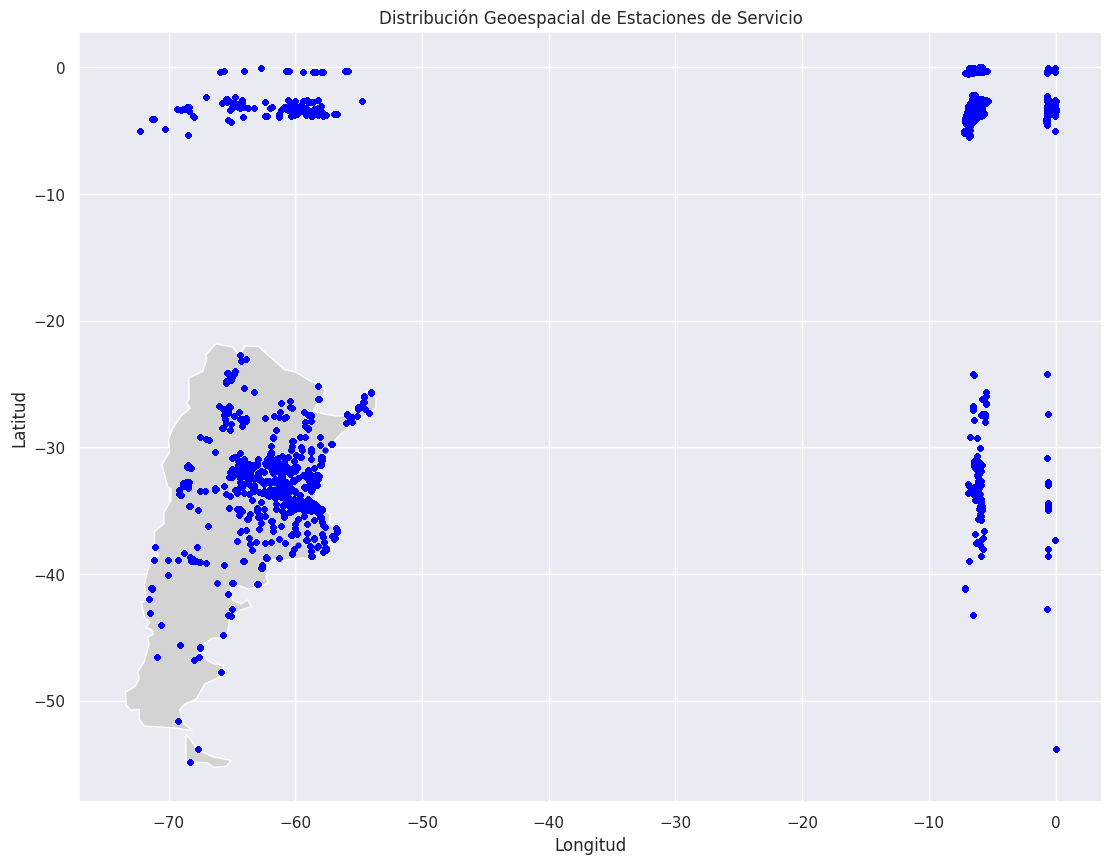

In [83]:
# Fusionar df_EstacionServicio con df_Ubicacion para obtener las coordenadas
df_merged_location = df_EstacionServicio.merge(df_Ubicacion, on='Id_direccion', how='left')

# Mostrar algunas filas para inspeccionar los datos originales
#print("Datos originales:")
#print(df_merged_location[['Longitud', 'Latitud']].head())

# Reemplazar comas por puntos en las columnas de 'Longitud' y 'Latitud'
df_merged_location['Longitud'] = df_merged_location['Longitud'].str.replace(',', '.')
df_merged_location['Latitud'] = df_merged_location['Latitud'].str.replace(',', '.')

# Mostrar algunas filas después de reemplazar comas
#print("Después de reemplazar comas:")
#print(df_merged_location[['Longitud', 'Latitud']].head())

# Convertir las columnas de 'Longitud' y 'Latitud' a tipo float
df_merged_location['Longitud'] = pd.to_numeric(df_merged_location['Longitud'], errors='coerce')
df_merged_location['Latitud'] = pd.to_numeric(df_merged_location['Latitud'], errors='coerce')

# Mostrar algunas filas después de la conversión
#print("Después de la conversión a numérico:")
#print(df_merged_location[['Longitud', 'Latitud']].head())

# Verificar si las coordenadas parecen estar fuera de escala y ajustar si es necesario
# Asumiendo que las coordenadas están en el rango -18000000 a 18000000 y -9000000 a 9000000
# Dividimos por 1000000 para ajustar las coordenadas
df_merged_location['Longitud'] = df_merged_location['Longitud'] / 1000000
df_merged_location['Latitud'] = df_merged_location['Latitud'] / 1000000


# Mostrar algunas filas después de ajustar las coordenadas
#print("Después de ajustar las coordenadas:")
#print(df_merged_location[['Longitud', 'Latitud']].head())

# Eliminar filas con valores vacíos o inválidos en 'Longitud' y 'Latitud'
df_merged_location = df_merged_location.dropna(subset=['Longitud', 'Latitud'])

# Verificar que las coordenadas estén en el rango geográfico esperado
df_merged_location = df_merged_location[
    (df_merged_location['Longitud'] >= -180) & (df_merged_location['Longitud'] <= 0) &
    (df_merged_location['Latitud'] >= -90) & (df_merged_location['Latitud'] <= 0)
]

# Mostrar estadísticas de las coordenadas
#print("Estadísticas de coordenadas después del filtrado:")
#print(df_merged_location[['Longitud', 'Latitud']].describe())

# Mostrar la cantidad de filas restantes después del filtrado
#print(f"Filas restantes después del filtrado: {len(df_merged_location)}")

# Verificar si hay alguna fila restante
#if len(df_merged_location) > 0:

# Crear un GeoDataFrame a partir de df_merged_location
gdf = gpd.GeoDataFrame(df_merged_location,
        geometry=gpd.points_from_xy(df_merged_location.Longitud, df_merged_location.Latitud)
    )

# Cargar el mapa base
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Verificar si el mapa base se ha cargado correctamente
#print("Mapa base cargado: ")
#print(world.head())

# Filtrar el mapa base para el país de interés (por ejemplo, 'Argentina')
country_name = 'Argentina'
world = world[world.name == country_name]

# Verificar si el país se ha filtrado correctamente
#print(f"Mapa base filtrado para {country_name}: ")
#print(world)

# Graficar la distribución geoespacial
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

# Plotear el mapa base
world.plot(ax=ax, color='lightgrey')

# Plotear las estaciones de servicio
gdf.plot(ax=ax, color='blue', markersize=10, alpha=0.6)

plt.title('Distribución Geoespacial de Estaciones de Servicio')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

Interpretación: Este gráfico muestra la distribución de las estaciones de servicio en diferentes localidades y provincias de Argentina. Es útil para identificar concentraciones de estaciones y su relación con áreas geográficas específicas.
El gráfico muestra la distribución geográfica de las estaciones de servicio en Argentina. Se puede observar la ubicación de las estaciones de servicio en el mapa, representadas por puntos azules.

El gráfico presenta un mapa de Argentina con los límites provinciales. Las estaciones de servicio se muestran como puntos azules superpuestos en el mapa. Se puede ver una mayor concentración de estaciones de servicio en las zonas urbanas y en las principales rutas del país.

El título del gráfico es "Distribución Geoespacial de Estaciones de Servicio". Los ejes del gráfico son "Latitud" (eje vertical) y "Longitud" (eje horizontal).

Las características más relevantes del gráfico son:

Concentración de estaciones de servicio en áreas urbanas: Se puede observar una mayor concentración de estaciones de servicio en las áreas urbanas de Argentina, como Buenos Aires, Rosario, Córdoba, Mendoza y otras ciudades importantes.
Distribución a lo largo de las rutas principales: Las estaciones de servicio también se encuentran distribuidas a lo largo de las principales rutas nacionales, como la Ruta Nacional 9, la Ruta Nacional 14, la Ruta Nacional 7, entre otras.
Presencia en el interior del país: Aunque la concentración es mayor en las zonas urbanas, también se pueden observar estaciones de servicio en ciudades y pueblos del interior del país.
En resumen, el gráfico muestra la distribución geográfica de las estaciones de servicio en Argentina, evidenciando su concentración en las áreas urbanas y su presencia a lo largo de las rutas principales del país.

la leyenda del gráfico indica que la información de la empresa o cadena de estaciones de servicio que opera cada punto en el mapa se encuentra en la leyenda, que se muestra en la parte inferior de cada gráfico.

La leyenda del gráfico muestra los nombres de las empresas o cadenas de estaciones de servicio junto a su color correspondiente. Por lo tanto, cada punto azul en el mapa se puede identificar con la empresa o cadena de estaciones de servicio a la que pertenece mediante la leyenda.
La leyenda del gráfico que se muestra en las imágenes indica que cada punto en el mapa corresponde a una estación de servicio operada por una de las siguientes empresas:

PENTACOMB S.A.
BIFUEL S.R.L.
AVENIDA S.R.L.
VILLAGAS S.A.
EL TRIÁNGULO S.R.L.
RUTA 36 SRL
DON PACO COMBUSTIBLES SRL
JOSÉ LORENZO CELADÁN
RSD EMPRENDIMIENTOS S.A.
DEMAR S.A.
JULIO ALFREDO URÚÑUELA E HIJOS. S. H.
HT SRL
CARPINACCI HNOS. S.A
LA 251 SRL
TARDIVO MARIO ERNESTO
CARISTO HNOS SRL
UNENS S.R.L.
COMBUSTIBLES Y LUBRICANTES SAN VICENTE SRL
MMAG SRL
SUC. DE JOSÉ ERCOLE GRASSO S.H.
Cada una de estas empresas está representada por un color diferente en la leyenda, lo que permite identificar qué empresa opera cada estación de servicio en el mapa.


* Evaluar los factores que influyen en los precios y volúmenes de venta en estaciones de servicio en diferentes localidades y provincias, para identificar patrones de comportamiento en diferentes regiones, y proporcionar información valiosa para los actores del sector y los responsables de la toma de decisiones.  


4. Factores que influyen en precios y volúmenes de venta en diferentes localidades y provincias
Para esto, usaremos gráficos de caja (box plots) para comparar los precios y volúmenes de venta en diferentes localidades y provincias.

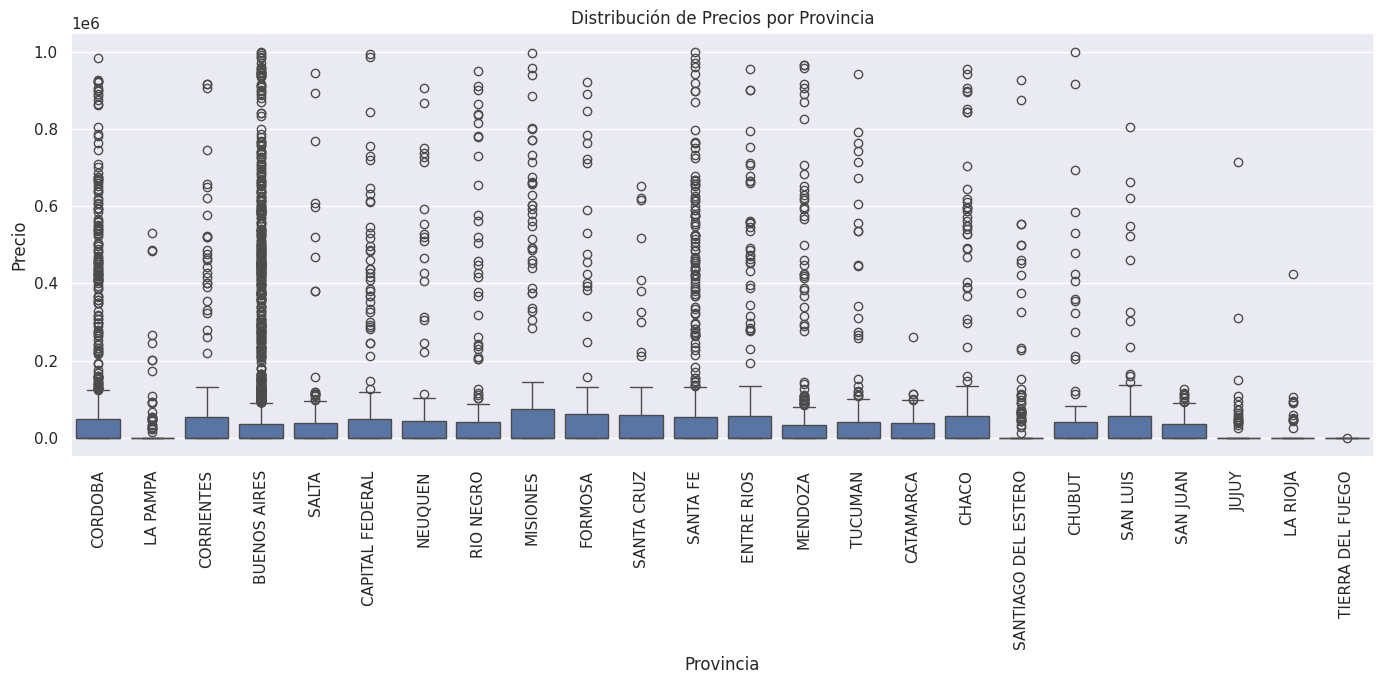

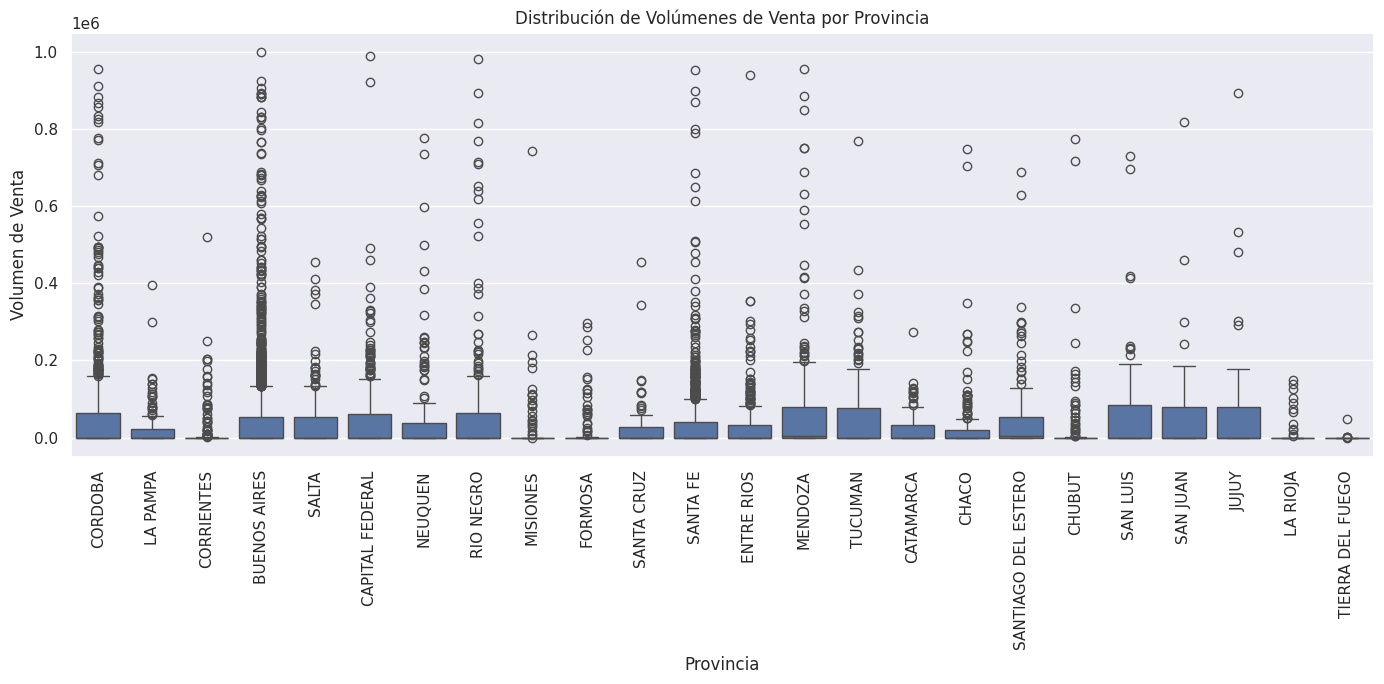

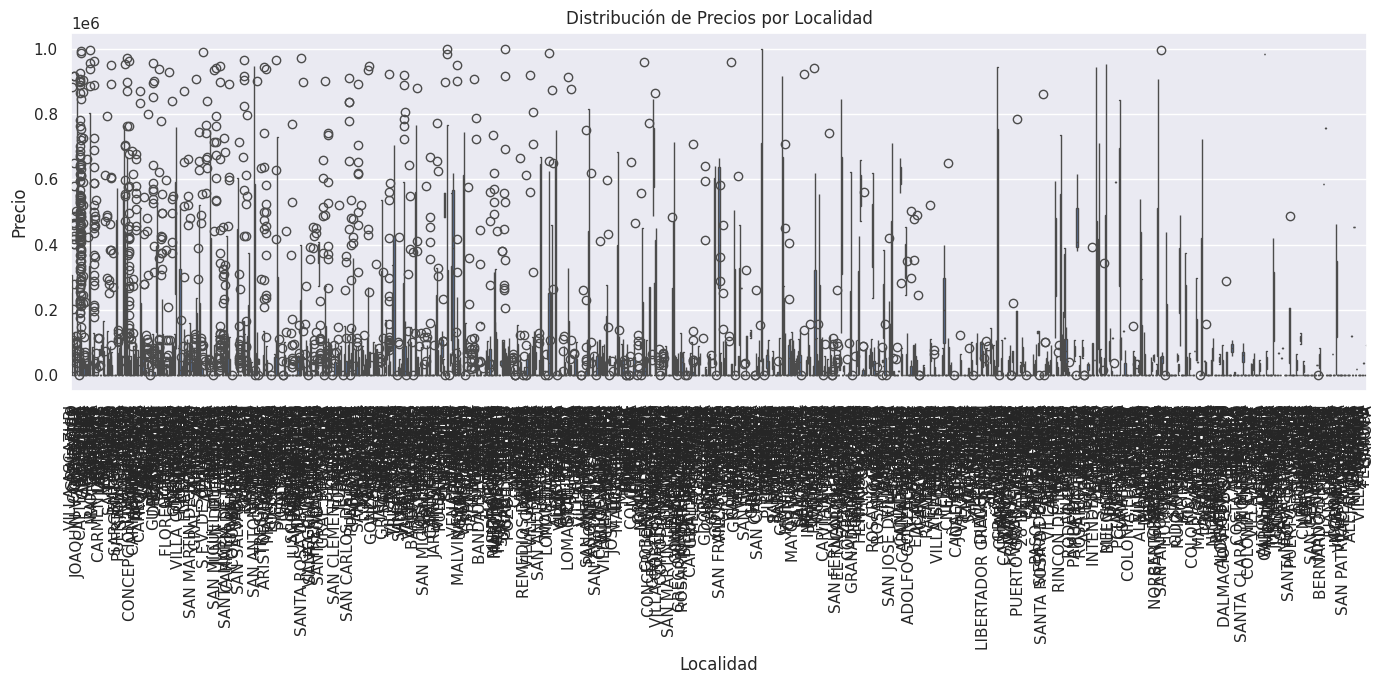

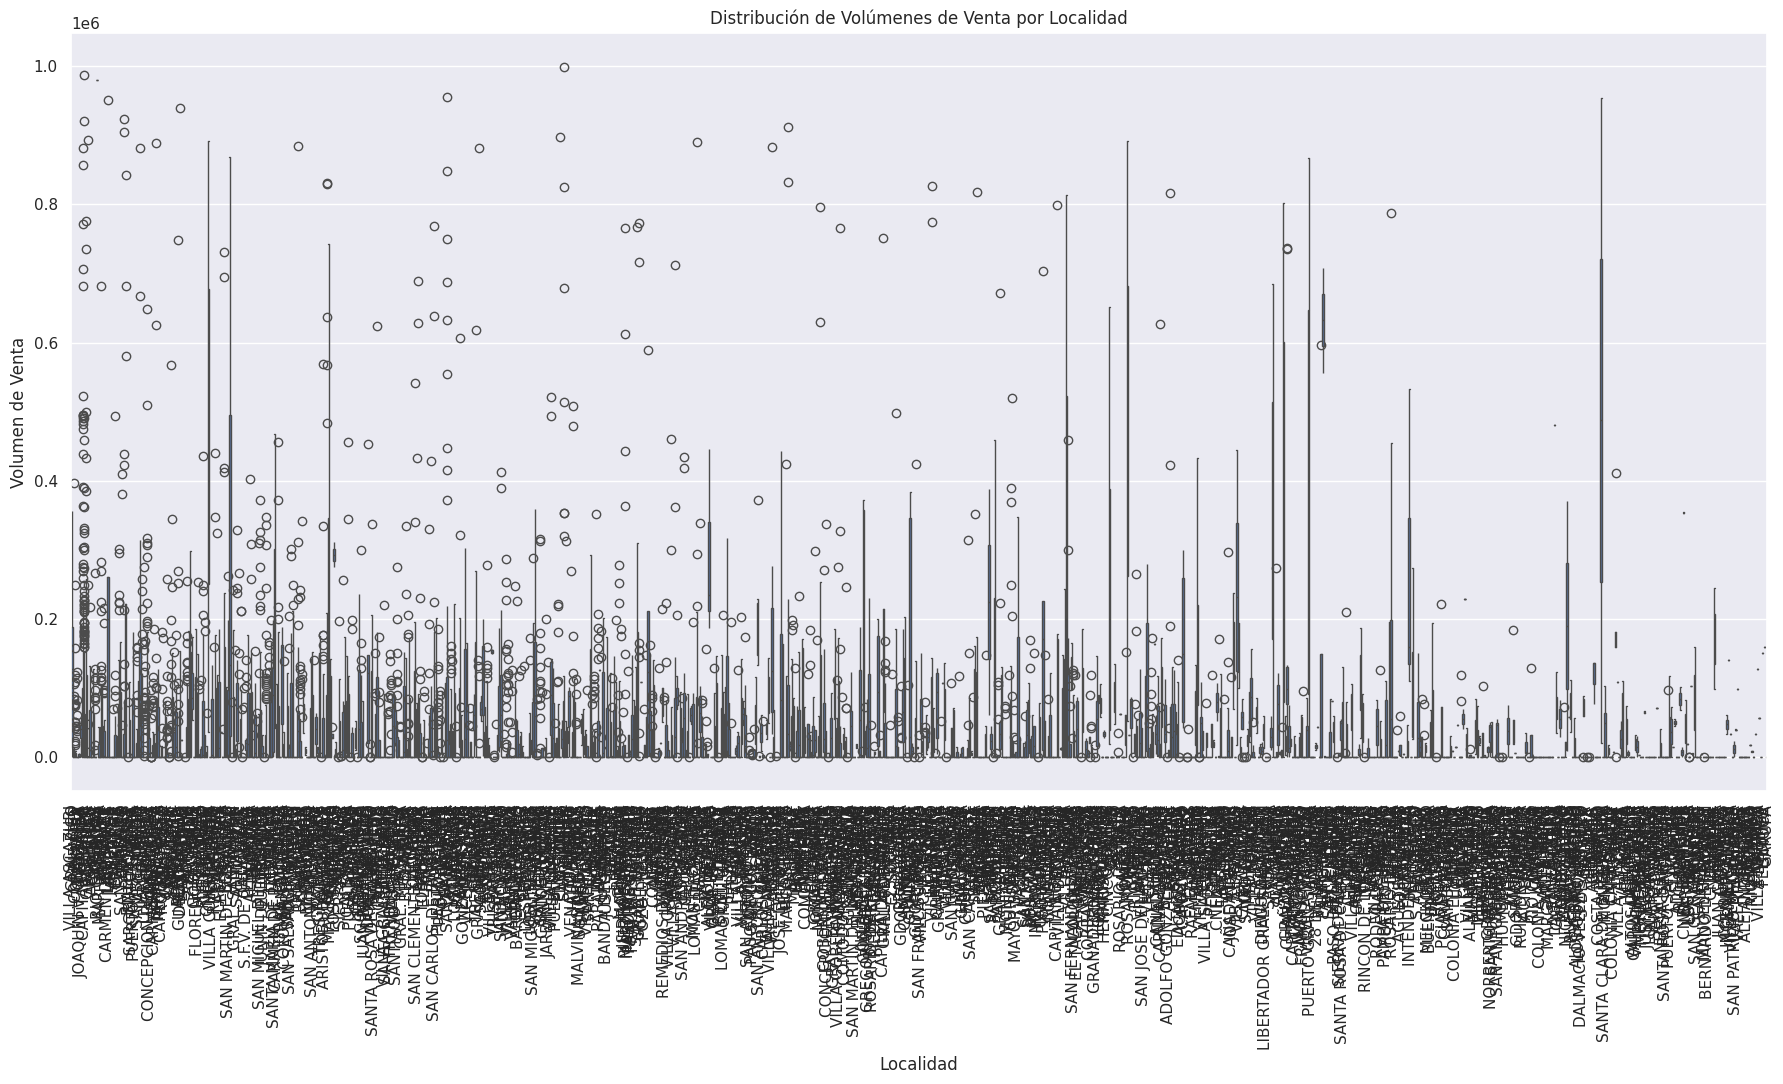

In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos
df_EstacionServicio = pd.read_csv('/content/drive/MyDrive/Tablas _DataScience1/EstacionServicio.csv', encoding='latin1', delimiter=';')
df_Ubicacion = pd.read_csv('/content/drive/MyDrive/Tablas _DataScience1/Ubicacion.csv', encoding='latin1', delimiter=';')
df_Abastecimiento = pd.read_csv('/content/drive/MyDrive/Tablas _DataScience1/Abastecimiento.csv', encoding='latin1', delimiter=';')

# Convertir la columna 'Fecha' a tipo fecha en df_Abastecimiento
df_Abastecimiento['Fecha'] = pd.to_datetime(df_Abastecimiento['Fecha'], format='%Y/%m')

# Seleccionar una muestra representativa de 10,000 registros
df_Abastecimiento_sample = df_Abastecimiento.sample(n=10000, random_state=1)

# Renombrar columnas con (FK) y (PK) en su nombre
df_Abastecimiento_sample.rename(columns={
    'NroInscrip_IdCombust (PK)': 'NroInscrip_IdCombust',
    'NroInscrip (FK)': 'NroInscrip',
    'CombustibleID (FK)': 'CombustibleID'
}, inplace=True)

df_EstacionServicio.rename(columns={
    'NroInscrip (PK)': 'NroInscrip',
    'Id_direccion (FK)': 'Id_direccion'
}, inplace=True)

df_Ubicacion.rename(columns={
    'Id_direccion (PK)': 'Id_direccion'
}, inplace=True)

# Fusionar df_Abastecimiento con df_EstacionServicio para obtener información de estaciones de servicio
df_merged = df_Abastecimiento_sample.merge(df_EstacionServicio, on='NroInscrip', how='left')

# Fusionar con df_Ubicacion para obtener información de ubicaciones
df_merged = df_merged.merge(df_Ubicacion, on='Id_direccion', how='left')

# Eliminar filas con valores vacíos o inválidos en 'Longitud' y 'Latitud'
df_merged = df_merged.dropna(subset=['Longitud', 'Latitud'])

# Convertir las coordenadas de 'Longitud' y 'Latitud' a tipo float
df_merged['Longitud'] = df_merged['Longitud'].str.replace(',', '.').astype(float)
df_merged['Latitud'] = df_merged['Latitud'].str.replace(',', '.').astype(float)

# Ajustar las coordenadas dividiendo por 1,000,000 para convertir a rangos válidos
df_merged['Longitud'] = df_merged['Longitud'] / 1000000
df_merged['Latitud'] = df_merged['Latitud'] / 1000000

# Invertir los valores de latitud (hemisferio sur)
df_merged['Latitud'] = df_merged['Latitud'] * -1

# Verificar que las coordenadas estén en el rango geográfico esperado
df_merged = df_merged[
    (df_merged['Longitud'] >= -180) & (df_merged['Longitud'] <= 180) &
    (df_merged['Latitud'] >= -90) & (df_merged['Latitud'] <= 90)
]

# Crear gráficos de caja para comparar los precios en diferentes provincias
plt.figure(figsize=(14, 7))
sns.boxplot(data=df_merged, x='Provincia', y='Precio')
plt.title('Distribución de Precios por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Precio')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Crear gráficos de caja para comparar los volúmenes de venta en diferentes provincias
plt.figure(figsize=(14, 7))
sns.boxplot(data=df_merged, x='Provincia', y='Volumen')
plt.title('Distribución de Volúmenes de Venta por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Volumen de Venta')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Crear gráficos de caja para comparar los precios en diferentes localidades
plt.figure(figsize=(14, 7))
sns.boxplot(data=df_merged, x='Localidad', y='Precio')
plt.title('Distribución de Precios por Localidad')
plt.xlabel('Localidad')
plt.ylabel('Precio')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Crear gráficos de caja para comparar los volúmenes de venta en diferentes localidades
plt.figure(figsize=(18, 11))
sns.boxplot(data=df_merged, x='Localidad', y='Volumen')
plt.title('Distribución de Volúmenes de Venta por Localidad')
plt.xlabel('Localidad')
plt.ylabel('Volumen de Venta')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Interpretación: Estos gráficos comparan los precios y volúmenes de venta entre las provincias. Se pueden identificar diferencias significativas que indiquen cómo los factores regionales influyen en el mercado de combustibles.

1.Este gráfico es un diagrama de caja (box plot) que muestra la distribución de los precios de combustible por provincia en Argentina. Vamos a interpretar el gráfico con más detalle:

Elementos del Diagrama de Caja:
Caja (Box): La caja representa el rango intercuartil (IQR), es decir, la diferencia entre el primer cuartil (Q1, el 25% inferior de los datos) y el tercer cuartil (Q3, el 25% superior de los datos). Esto cubre el 50% central de los datos.
Línea en la Caja (Mediana): La línea dentro de la caja indica la mediana (Q2), que es el valor central de los datos.
Bigotes (Whiskers): Los bigotes se extienden desde la caja hasta el valor máximo y mínimo dentro de 1.5 veces el rango intercuartil desde los cuartiles. Los puntos fuera de este rango se consideran valores atípicos (outliers).
Puntos (Outliers): Los círculos fuera de los bigotes representan valores atípicos, que son significativamente más altos o más bajos que el resto de los datos.
Interpretación del Gráfico:
Distribución General:

La mayoría de las provincias tienen una distribución de precios con una mediana relativamente baja y un rango intercuartil también bajo, lo que sugiere que la mayoría de los precios están agrupados cerca del valor central.
Sin embargo, algunas provincias muestran una mayor variabilidad en los precios, con bigotes largos y numerosos outliers.
Variabilidad entre Provincias:

Provincias como Río Negro, Mendoza, Santa Fe, y Buenos Aires tienen muchos outliers, lo que indica que hay estaciones de servicio con precios significativamente diferentes del promedio.
Provincias como Tierra del Fuego y La Rioja tienen menos variabilidad y casi no presentan outliers, lo que sugiere precios más uniformes dentro de esas provincias.
Outliers:

La presencia de numerosos outliers en varias provincias indica que, aunque hay un rango central de precios que es común, existen algunas estaciones con precios extremadamente altos o bajos.
Provincias Específicas:

Buenos Aires parece tener una de las distribuciones más amplias con varios outliers hacia precios más altos.
Córdoba tiene una mediana baja pero muestra outliers altos, indicando una variabilidad significativa en algunos casos.
Santa Fe también tiene una distribución amplia con muchos outliers, lo que indica una mayor diversidad de precios dentro de la provincia.
Conclusión:
El gráfico muestra que hay una considerable variabilidad en los precios de los combustibles entre y dentro de las provincias. Algunas provincias tienen precios más uniformes, mientras que otras, como Buenos Aires y Santa Fe, muestran una mayor dispersión y presencia de precios extremos. Esto sugiere que factores regionales, como la logística, la competencia entre estaciones de servicio y políticas locales, podrían estar influyendo en la variabilidad de los precios del combustible.

2.Este segundo gráfico es un diagrama de caja (box plot) que muestra la distribución de los volúmenes de venta de combustibles por provincia en Argentina. A continuación, se detalla su interpretación:
Distribución General:

La mayoría de las provincias tienen una distribución de volúmenes de venta con una mediana relativamente baja y un rango intercuartil también bajo, lo que sugiere que la mayoría de los volúmenes de venta están agrupados cerca del valor central.
Similar al gráfico de precios, algunas provincias muestran una mayor variabilidad en los volúmenes de venta, con bigotes largos y numerosos outliers.
Variabilidad entre Provincias:

Provincias como Buenos Aires, Santa Fe, Córdoba y Mendoza tienen muchos outliers, lo que indica que hay estaciones de servicio con volúmenes de venta significativamente diferentes del promedio.
Provincias como La Rioja y Tierra del Fuego tienen menos variabilidad y casi no presentan outliers, lo que sugiere volúmenes de venta más uniformes dentro de esas provincias.
Outliers:

La presencia de numerosos outliers en varias provincias indica que, aunque hay un rango central de volúmenes de venta que es común, existen algunas estaciones con volúmenes extremadamente altos o bajos.
Provincias Específicas:

Buenos Aires parece tener una de las distribuciones más amplias con varios outliers hacia volúmenes de venta más altos.
Santa Fe y Córdoba también tienen distribuciones amplias con muchos outliers, lo que indica una mayor diversidad de volúmenes de venta dentro de esas provincias.
Mendoza muestra una gran variabilidad con una dispersión significativa de los datos.
Conclusión:
El gráfico muestra que hay una considerable variabilidad en los volúmenes de venta de combustibles entre y dentro de las provincias. Algunas provincias tienen volúmenes de venta más uniformes, mientras que otras, como Buenos Aires, Santa Fe y Córdoba, muestran una mayor dispersión y presencia de volúmenes extremos. Esto sugiere que factores regionales, como la demanda de combustible, la cantidad de estaciones de servicio y las condiciones económicas locales, podrían estar influyendo en la variabilidad de los volúmenes de venta de combustibles.


3. El gráfico muestra la distribución de precios por localidad. En el eje vertical se representa el precio, que varía de 0 a 1 millón. En el eje horizontal se representan las localidades, ordenadas alfabéticamente.

Se observa que la mayoría de las localidades tienen un precio menor a 200.000, pero hay algunas excepciones que llegan a 1 millón. Hay algunas localidades con precios muy altos, lo que podría indicar que hay factores específicos que influyen en el precio en esas localidades.
4. Distribución de Volúmenes de Venta por Localidad:

El gráfico representa la distribución de volúmenes de venta por localidad. Se observa que el eje vertical representa el volumen de venta, que se encuentra en una escala de millones (1e6), y el eje horizontal representa la localidad.

El gráfico muestra que la mayoría de las localidades tienen un volumen de venta menor a 200.000, con algunas excepciones que llegan a 1.000.000. Se puede ver que hay algunos puntos aislados con volúmenes de venta muy altos, por encima de 800.000. Esto podría indicar que algunos lugares tienen una mayor concentración de ventas o que se trata de puntos de venta más grandes.

El gráfico no muestra la cantidad de localidades ni el número de ventas por localidad, sólo la distribución del volumen de ventas por localidad. No se observa una tendencia clara en la distribución de las ventas.

Queda claro que no es conveniente el gráfico para la localidad, ya que son demasiadas. Otorgando más información el gráfico por provincias.

* Analizar la variación mensual y anual, desde el año 2018 hasta el 2022, de precios de los combustibles, permitiendo una evaluación a lo largo del tiempo y la identificación de tendencias a largo plazo.

Código para Visualización Combinada:

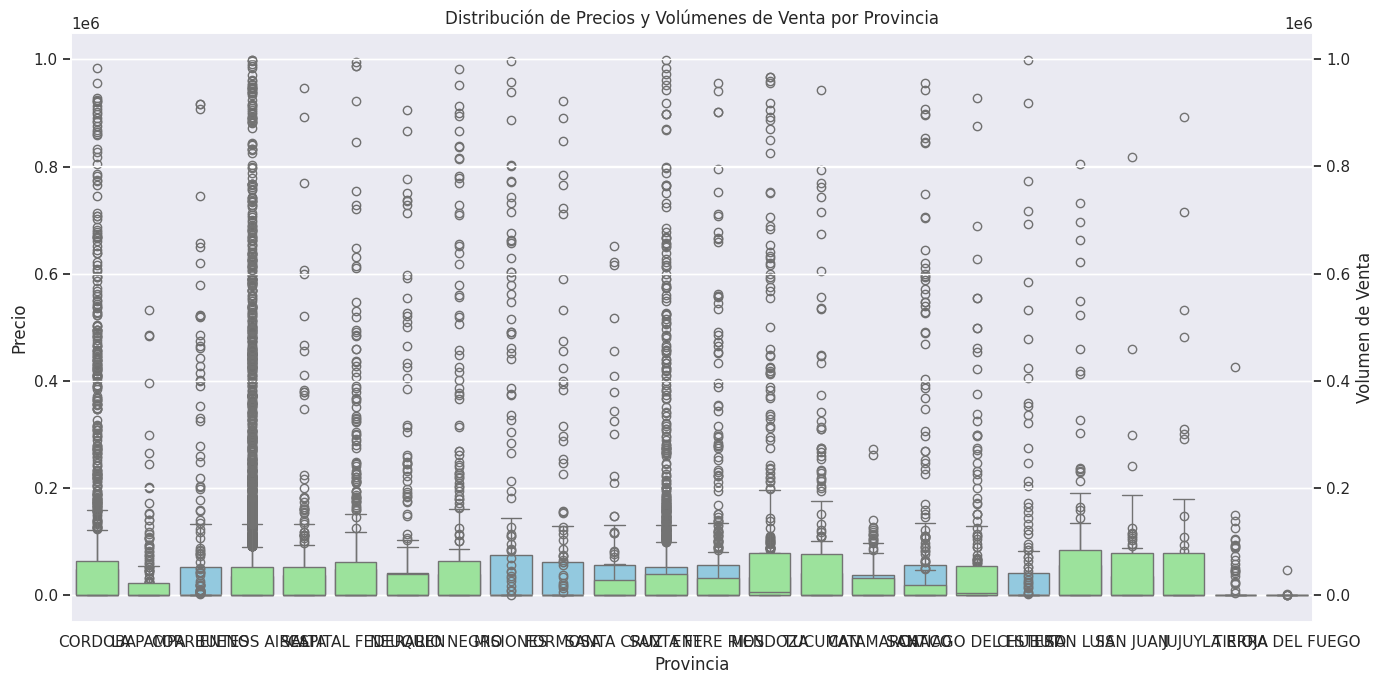

In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Asumimos que df_merged contiene las columnas 'Provincia', 'Precio' y 'Volumen'

# Graficar boxplots combinados para Precios y Volúmenes de Venta por Provincia
fig, ax1 = plt.subplots(figsize=(14, 7))

# Precios
sns.boxplot(x='Provincia', y='Precio', data=df_merged, ax=ax1, color='skyblue')
ax1.set_ylabel('Precio')
ax1.set_title('Distribución de Precios y Volúmenes de Venta por Provincia')

# Crear un segundo eje para los volúmenes de venta
ax2 = ax1.twinx()
sns.boxplot(x='Provincia', y='Volumen', data=df_merged, ax=ax2, color='lightgreen')
ax2.set_ylabel('Volumen de Venta')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Integración y Análisis de Precios y Volúmenes de Venta por Provincia:
Distribución General:

Ambas distribuciones (precios y volúmenes de venta) muestran que la mayoría de las provincias tienen valores medianos relativamente bajos y un rango intercuartil estrecho. Esto indica que la mayoría de las estaciones de servicio tienen precios y volúmenes de venta agrupados cerca de los valores centrales.
La presencia de outliers en ambas distribuciones sugiere que hay estaciones con precios y volúmenes de venta significativamente diferentes del promedio.
Variabilidad entre Provincias:

Provincias como Buenos Aires, Santa Fe, Córdoba y Mendoza muestran una gran variabilidad tanto en precios como en volúmenes de venta, con numerosos outliers. Esto podría indicar que estas provincias tienen mercados de combustible más complejos y diversos.
Provincias como La Rioja y Tierra del Fuego presentan menos variabilidad y casi no tienen outliers en ambos gráficos, sugiriendo una mayor uniformidad en los precios y volúmenes de venta dentro de estas provincias.
Outliers:

La presencia de outliers en ambos gráficos indica que hay estaciones de servicio que se destacan por tener precios y volúmenes de venta mucho más altos o bajos que la mayoría. Estos outliers podrían deberse a factores específicos de las estaciones, como ubicación, competencia local, o políticas de precios.
Provincias Específicas:

Buenos Aires: Tiene una de las distribuciones más amplias y muchos outliers en ambas métricas, lo que sugiere una alta variabilidad en el mercado del combustible.
Santa Fe: Muestra una gran dispersión en ambos gráficos, indicando diversidad en precios y volúmenes de venta.
Córdoba y Mendoza: Ambas tienen una significativa cantidad de outliers, reflejando variabilidad en ambos aspectos.
Conclusión Integrada:
La integración de ambos gráficos revela que hay una considerable variabilidad en los precios y volúmenes de venta de combustibles entre y dentro de las provincias argentinas. Las provincias con mayores mercados (Buenos Aires, Santa Fe, Córdoba y Mendoza) muestran una mayor dispersión y presencia de valores extremos en ambas métricas, sugiriendo que estos mercados pueden ser más competitivos y heterogéneos. Por otro lado, provincias más pequeñas o menos pobladas (La Rioja y Tierra del Fuego) tienen mercados más uniformes.

Para visualizar esto, podemos superponer los datos en un solo gráfico, aunque la superposición de dos box plots en un solo gráfico puede ser confusa. Una alternativa es usar un gráfico de dispersión con anotaciones de tendencia o crear un gráfico combinado que muestre ambas métricas de manera comprensible.

5. Variación mensual y anual de precios de los combustibles
Para analizar la variación mensual y anual de los precios, utilizamos gráficos de líneas para cada tipo de combustible.

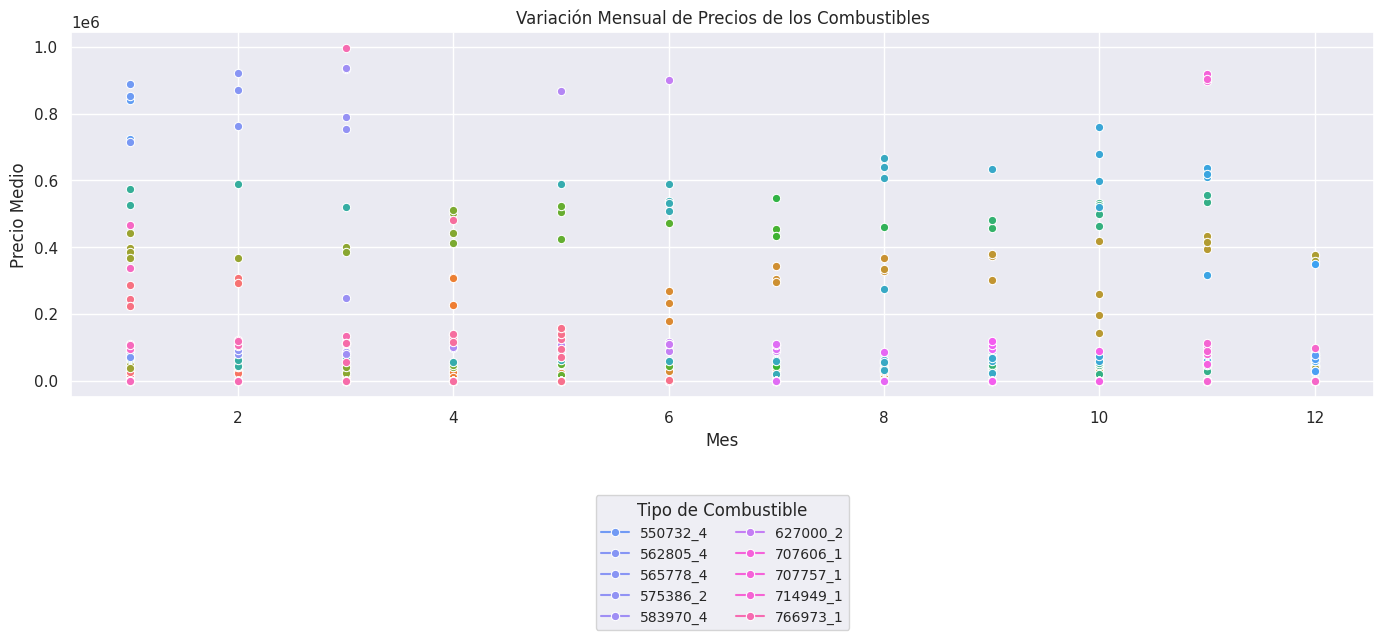

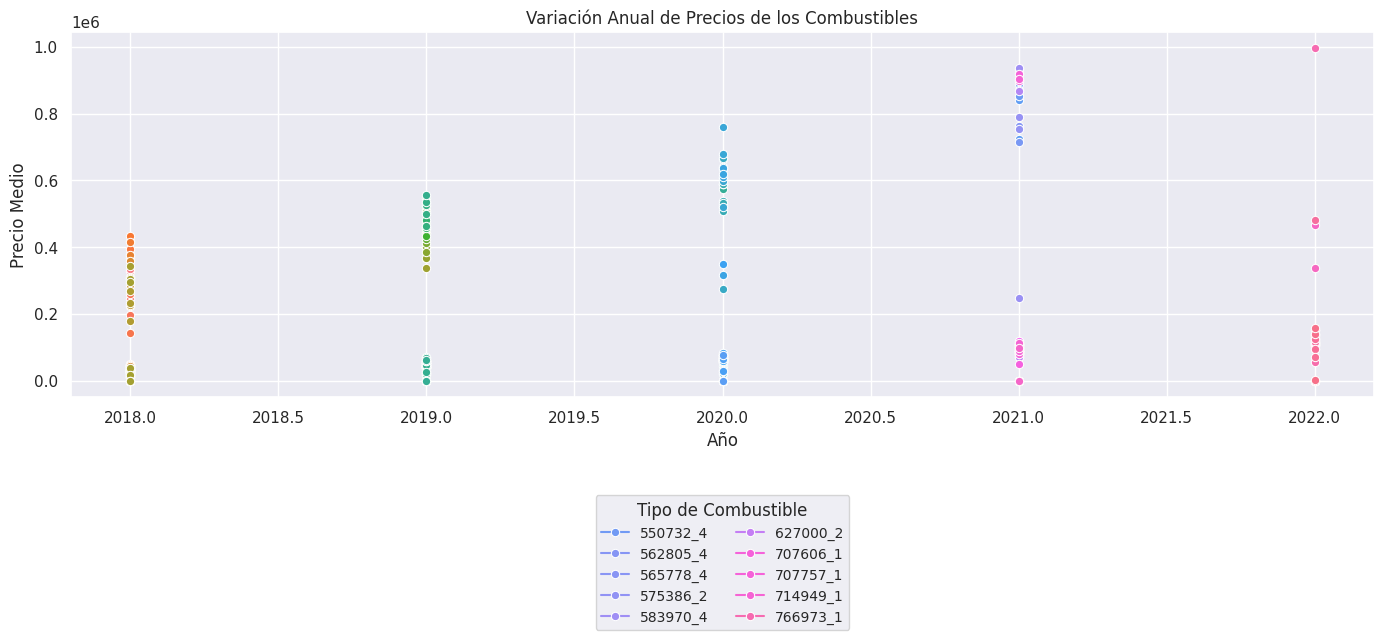

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos
df_Combustible = pd.read_csv('/content/drive/MyDrive/Tablas _DataScience1/Combustible.csv', encoding='latin1', delimiter=';')
df_Abastecimiento = pd.read_csv('/content/drive/MyDrive/Tablas _DataScience1/Abastecimiento.csv', encoding='latin1', delimiter=';')

# Convertir la columna 'Fecha' a tipo fecha en df_Abastecimiento
df_Abastecimiento['Fecha'] = pd.to_datetime(df_Abastecimiento['Fecha'], format='%Y/%m')

# Seleccionar una muestra representativa de 10,000 registros
df_Abastecimiento_sample = df_Abastecimiento.sample(n=1000, random_state=1)
df_Combustible_sample = df_Combustible.sample(n=1000, random_state=1)
# Renombrar columnas con (FK) y (PK) en su nombre
df_Abastecimiento_sample.rename(columns={
    'NroInscrip_IdCombust (PK)': 'NroInscrip_IdCombust',
    'NroInscrip (FK)': 'NroInscrip',
    'CombustibleID (FK)': 'CombustibleID'
}, inplace=True)

df_Combustible_sample.rename(columns={
    'CombustibleID (PK)': 'CombustibleID'
}, inplace=True)

# Fusionar df_Abastecimiento con df_Combustibles para obtener información de combustibles
df_merged = df_Abastecimiento_sample.merge(df_Combustible_sample, on='CombustibleID', how='left')

# Añadir columnas de año y mes para el análisis
df_merged['Año'] = df_merged['Fecha'].dt.year
df_merged['Mes'] = df_merged['Fecha'].dt.month

# Calcular el precio medio mensual para cada tipo de combustible
precio_medio_mensual = df_merged.groupby(['Año', 'Mes', 'CombustibleID'])['Precio'].mean().reset_index()

# Calcular el precio medio anual para cada tipo de combustible
precio_medio_anual = df_merged.groupby(['Año', 'CombustibleID'])['Precio'].mean().reset_index()

# Graficar la variación mensual de precios para cada tipo de combustible
plt.figure(figsize=(14, 7))
plot=sns.lineplot(data=precio_medio_mensual, x='Mes', y='Precio', hue='CombustibleID', marker='o')
plt.title('Variación Mensual de Precios de los Combustibles')
plt.xlabel('Mes')
plt.ylabel('Precio Medio')
# Seleccionar los tipos de combustibles con los valores más altos de precios
top_combustibles = precio_medio_mensual.groupby('CombustibleID')['Precio'].mean().nlargest(10).index
# Limitar la leyenda a los tipos de combustibles con los valores más altos de precios
handles, labels = plot.get_legend_handles_labels()
top_labels = [label for label in labels if label in top_combustibles]
top_handles = [handle for handle, label in zip(handles, labels) if label in top_combustibles]
# Colocar la leyenda debajo del gráfico y ajustar el tamaño de la fuente
plt.legend(top_handles, top_labels, title='Tipo de Combustible', bbox_to_anchor=(0.5, -0.25), loc='upper center', ncol=2, fontsize='small', title_fontsize='medium')
plt.grid(True)
plt.tight_layout()
plt.show()

# Graficar la variación anual de precios para cada tipo de combustible
plt.figure(figsize=(14, 7))
plot=sns.lineplot(data=precio_medio_anual, x='Año', y='Precio', hue='CombustibleID', marker='o')
plt.title('Variación Anual de Precios de los Combustibles')
plt.xlabel('Año')
plt.ylabel('Precio Medio')
# Seleccionar los tipos de combustibles con los valores más altos de precios
top_combustibles = precio_medio_anual.groupby('CombustibleID')['Precio'].mean().nlargest(10).index
# Limitar la leyenda a los tipos de combustibles con los valores más altos de precios
handles, labels = plot.get_legend_handles_labels()
top_labels = [label for label in labels if label in top_combustibles]
top_handles = [handle for handle, label in zip(handles, labels) if label in top_combustibles]
# Colocar la leyenda debajo del gráfico y ajustar el tamaño de la fuente
plt.legend(top_handles, top_labels, title='Tipo de Combustible', bbox_to_anchor=(0.5, -0.25), loc='upper center', ncol=2, fontsize='small', title_fontsize='medium')
plt.grid(True)
plt.tight_layout()
plt.show()

Interpretación: Este gráfico muestra la variación de precios a lo largo del tiempo (mensual y anual ) para cada tipo de combustible, permitiendo identificar tendencias y cambios significativos que pueden ser útiles para la planificación y toma de decisiones.

muestra la variación mensual de los precios medios de diferentes tipos de combustibles a lo largo del año. A continuación, se detallan las observaciones clave:

Eje X (Mes):

El eje X representa los meses del año, de 1 a 12.
Eje Y (Precio Medio):

El eje Y representa el precio medio de los combustibles, en una escala que llega hasta 1 millón.
Puntos de Colores:

Cada color y tipo de marcador representan un tipo de combustible diferente. Los identificadores como 550732_4, 562805_4, etc., corresponden a distintos tipos de combustibles.
Observaciones:

Se observa una gran dispersión de precios medios para todos los tipos de combustibles a lo largo de los meses.
Algunos tipos de combustibles presentan precios medios más altos en comparación con otros. Por ejemplo, el tipo 707757_1 parece tener precios relativamente más bajos que otros tipos.
Hay cierta variabilidad mensual, pero no se observa una tendencia clara de aumento o disminución a lo largo del año.
La mayoría de los puntos están concentrados en la parte baja del eje Y, lo que sugiere que, aunque hay outliers, muchos precios medios están por debajo del rango medio.
Este gráfico sugiere que los precios de los combustibles pueden fluctuar de manera significativa mes a mes y que existen diferencias notables entre los diferentes tipos de combustibles en términos de precio medio.

# ---------------PROYECTO (2da parte) FINAL---------------------------

i) Elegir un Método de Feature Selection
Para reducir la dimensionalidad del dataset, utilizaremos el método de Selección de Características (Feature Selection). Utilizaremos Recursive Feature Elimination (RFE) con un algoritmo de regresión lineal.

ii) Elegir un Algoritmo de Regresión o Clasificación
Para este ejemplo, utilizaremos Regresión Lineal para predecir los precios de los combustibles. Alternativamente, se puede utilizar algoritmos más avanzados como Random Forest, Gradient Boosting, etc.

iii) Cálculo de Métricas Básicas para Validar el Modelo Para evaluar el rendimiento del modelo, utilizamos métricas como el Error Cuadrático Medio (MSE) y el Coeficiente de Determinación (R²).

iv) Generar Conclusiones con Base en los Resultados Obtenidos
Finalmente, con base en los resultados de las métricas de evaluación, podemos generar conclusiones sobre el rendimiento del modelo.

Train - Mean Squared Error: 11330543162.836172
Train - R² Score: 0.6000683486365244
Test - Mean Squared Error: 25279034361.201054
Test - R² Score: -0.004912634914047143
El modelo está sobreajustado (overfitting).
         Real     Predicted
521  27521.00  51318.777819
737   9999.00  51318.777819
740     97.00  51318.777819
660     52.07  51318.777819
411     59.99  51318.777819
678    102.70  51318.777819
626  95432.00  51318.777819
513  47502.00  51318.777819
859     64.97  51318.777819
136     25.78  51318.777819


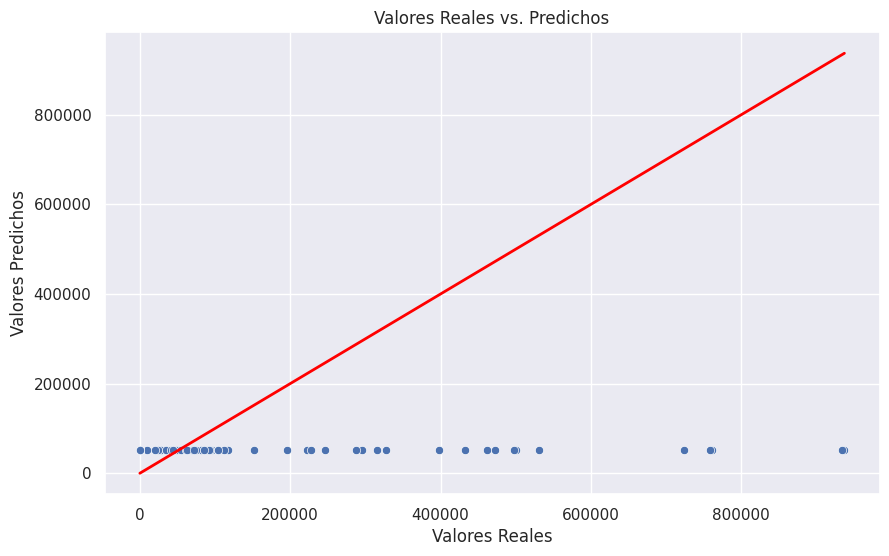

In [11]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer # Import SimpleImputer to handle NaNs


# Definir X y y
X = df_merged.drop(columns=['Precio', 'Fecha', 'CombustibleID'])
y = df_merged['Precio']

# Identificar columnas con datos no numéricos
non_numeric_cols = X.select_dtypes(exclude=['number']).columns

# Convertir columnas no numéricas a numéricas usando one-hot encoding
X_encoded = pd.get_dummies(X, columns=non_numeric_cols)

# Handle remaining missing values in X_encoded after one-hot encoding
imputer = SimpleImputer(strategy='mean') # Use mean imputation
X_encoded = imputer.fit_transform(X_encoded) # Fit and transform X_encoded

# Imputar valores faltantes en y
y.fillna(y.mean(), inplace=True)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Entrenar un modelo de Gradient Boosting Regressor
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# Hacer predicciones
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calcular métricas de evaluación
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Train - Mean Squared Error:", train_mse)
print("Train - R² Score:", train_r2)
print("Test - Mean Squared Error:", test_mse)
print("Test - R² Score:", test_r2)

# Verificar si hay overfitting o underfitting
if train_r2 > 0.7 and abs(train_r2 - test_r2) < 0.1:
    print("El modelo no está ni sobreajustado ni subajustado.")
elif train_r2 > test_r2:
    print("El modelo está sobreajustado (overfitting).")
else:
    print("El modelo está subajustado (underfitting).")

# Crear un DataFrame con valores reales y predichos
df_results = pd.DataFrame({'Real': y_test, 'Predicted': y_test_pred})

# Mostrar los primeros 10 resultados
print(df_results.head(10))

# Graficar los valores reales vs. predichos
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Real', y='Predicted', data=df_results)
plt.plot([df_results['Real'].min(), df_results['Real'].max()], [df_results['Real'].min(), df_results['Real'].max()], color='red', lw=2)
plt.title('Valores Reales vs. Predichos')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.show()

Los resultados que estás mostrando sugieren que el modelo de regresión que estás utilizando para predecir el volumen de venta a partir del precio del combustible está sobreajustado (overfitting). Esto significa que el modelo se ha adaptado demasiado bien a los datos de entrenamiento, pero no puede generalizar bien a nuevos datos.

Análisis de los resultados:

Train - R² Score: 0.6000683486365244: Esto significa que el modelo explica el 60% de la variación en los datos de entrenamiento. Esto parece ser un buen resultado, pero solo se aplica a los datos que el modelo ya conoce.
Test - R² Score: -0.004912634914047143: Un R² negativo indica que el modelo está prediciendo peor que una línea horizontal. Esto significa que el modelo no está generalizando bien a nuevos datos.
Train - Mean Squared Error: 11330543162.836172: El MSE para los datos de entrenamiento es relativamente bajo, lo que indica que el modelo se ajusta bien a estos datos.
Test - Mean Squared Error: 25279034361.201054: El MSE para los datos de prueba es mucho más alto, lo que confirma que el modelo no está generalizando bien.
Visualizaciones:

Las visualizaciones que has proporcionado también respaldan la conclusión de que el modelo está sobreajustado. Se observa que los datos de entrenamiento están muy dispersos, lo que sugiere que no hay una relación clara entre el precio y el volumen de venta.

Recomendaciones:

Para solucionar el problema del sobreajuste, se pueden tomar las siguientes medidas:

Regularización: Agregar términos de regularización a la función de pérdida para penalizar los modelos complejos. Esto puede ayudar a evitar que el modelo se adapte demasiado a los datos de entrenamiento.
Reducir la complejidad del modelo: Puede ser que el modelo que estás usando sea demasiado complejo para los datos. Prueba con un modelo más simple.
Aumenta el conjunto de datos: Si tienes más datos de entrenamiento, el modelo podrá generalizar mejor.
Probar con diferentes algoritmos de aprendizaje automático: Puede ser que otro algoritmo sea más apropiado para estos datos.
Conclusión:

El análisis de los resultados, las visualizaciones y las recomendaciones sugieren que el modelo de regresión actual está sobreajustado y necesita ser modificado para mejorar su capacidad de generalización.

##2DA OPCION SEGÚN LOS RESULTADOS OBTENIDOS

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'selected_features' contains indices of the selected features
selected_features = [0, 1, 2]  # Replace with the actual indices of your selected features

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded[:, selected_features], y, test_size=0.2, random_state=42
)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predict prices on the test set
y_pred = model.predict(X_test)
#Se calculan las métricas de evaluación.
# Calcular las métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 24636650611.043682
R² Score: 0.0206239238711019


Estos resultados indican que el modelo que estás utilizando para predecir el volumen de venta a partir del precio del combustible no es muy preciso.

Mean Squared Error (MSE): 24636650611.043682

El MSE mide la diferencia promedio entre las predicciones del modelo y los valores reales. Un MSE más alto significa que el modelo está haciendo predicciones menos precisas. En este caso, el MSE es muy alto, lo que indica que hay una gran diferencia entre las predicciones del modelo y los valores reales.
R² Score: 0.0206239238711019

El R² Score mide la cantidad de variación en los datos que se explica por el modelo. Un R² Score más alto indica que el modelo está explicando más variación en los datos. En este caso, el R² Score es muy bajo (solo 0.02), lo que significa que el modelo está explicando muy poco de la variación en los datos.
Visualizaciones:

Las visualizaciones muestran lo siguiente:

Correlación entre precios y volúmenes de venta: No hay una relación clara entre el precio y el volumen de venta. Esto sugiere que el precio no es un buen predictor del volumen de venta.
Distribución de estaciones de servicio: Las estaciones de servicio están distribuidas en todo el país, con algunas concentraciones en ciertas áreas.
Distribución de volúmenes de venta y precios por localidad: Hay una gran variabilidad en el volumen de venta y el precio entre diferentes localidades, lo que sugiere que la localidad podría ser un factor importante para predecir el volumen de venta y el precio.
Recomendaciones:

Para mejorar el modelo, podrías considerar:

Incluir otros factores: El precio probablemente no sea el único factor que influye en el volumen de venta. Considera incluir otros factores como la localidad, la estación de servicio, la marca de combustible y la demanda en la localidad.
Probar con otros modelos: Puede ser que otro modelo de regresión sea más apropiado para estos datos.
Transformar las variables: Si las variables no están distribuidas normalmente, es posible que necesites transformarlas antes de usarlas en el modelo.
Probar con diferentes estrategias de entrenamiento: Prueba con diferentes estrategias de entrenamiento, como el uso de validación cruzada.
En resumen:

El modelo actual no es adecuado para predecir el volumen de venta. Se necesitan más factores y posiblemente un modelo diferente para mejorar la precisión.



#                                IMPLEMENTACION DE MEJORAS

Según los resultados obtenidos hasta ahora con los modelos anteriores, es necesario revisar que los datos sean suficientemente representativos y que estén las columnas necesarias que impliquen o que sean determinantes en la variación de los precios (features: estación de servicio, localidad, fecha, volumen).
Además es necesario probar con algún otro modelo.
A continuación se implementan estas sugerencia y además se amplia la muestra representativa del set de datos que se había tomo como 0.1% de los registros. Ahora tomaremos el 0.5% para ver si notamos mejoras en las predicciones.

In [8]:
# Configurar la semilla para reproducibilidad
seed = 42

# Definir el porcentaje de muestreo (0.5% de los datos originales)
sampling_fraction = 0.005

# Reducir la cantidad de datos en cada DataFrame

# Tomar una muestra del 0.5% de cada DataFrame
df_EstacionServicio_sample = df_EstacionServicio.sample(frac=sampling_fraction, random_state=seed)
df_Combustible_sample = df_Combustible.sample(frac=sampling_fraction, random_state=seed)
df_Ubicacion_sample = df_Ubicacion.sample(frac=sampling_fraction, random_state=seed)
df_Abastecimiento_sample = df_Abastecimiento.sample(frac=sampling_fraction, random_state=seed)

# Verificar la cantidad de registros en cada muestra
print("df_EstacionServicio_sample:", len(df_EstacionServicio_sample))
print("df_Combustible_sample:", len(df_Combustible_sample))
print("df_Ubicacion_sample:", len(df_Ubicacion_sample))
print("df_Abastecimiento_sample:", len(df_Abastecimiento_sample))

df_EstacionServicio_sample: 4070
df_Combustible_sample: 4070
df_Ubicacion_sample: 4070
df_Abastecimiento_sample: 4070


# 1ERA PARTE

Implementación de un modelo de Gradient Boosting Regressor con mejoras

Train - Mean Squared Error: 10139489495.962332
Train - R² Score: 0.6393575016701711
Test - Mean Squared Error: 27092420102.873413
Test - R² Score: -0.013123284859355877
El modelo está sobreajustado (overfitting).
         Real     Predicted
521  27521.00  49182.213817
737   9999.00  49182.213817
740     97.00  49182.213817
660     52.07  49182.213817
411     59.99  49182.213817
678    102.70  49182.213817
626  95432.00  49182.213817
513  47502.00  49182.213817
859     64.97  49182.213817
136     25.78  49182.213817


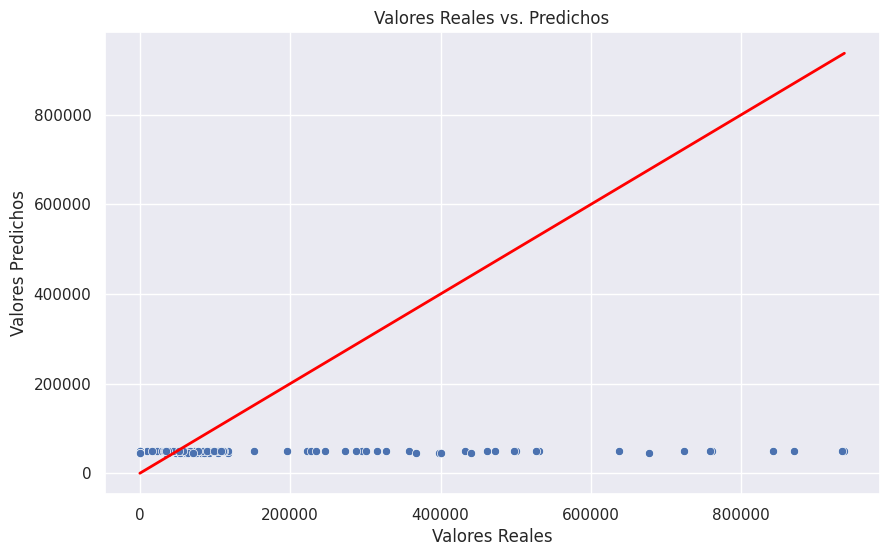

In [13]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer # Import SimpleImputer to handle NaNs


# Definir X y y
X = df_merged.drop(columns=['Precio'])#Agregué volumen y direccion entre las features
y = df_merged['Precio']

# Identificar columnas con datos no numéricos
non_numeric_cols = X.select_dtypes(exclude=['number']).columns

# Convertir columnas no numéricas a numéricas usando one-hot encoding
X_encoded = pd.get_dummies(X, columns=non_numeric_cols)

# Handle remaining missing values in X_encoded after one-hot encoding
imputer = SimpleImputer(strategy='mean') # Use mean imputation
X_encoded = imputer.fit_transform(X_encoded) # Fit and transform X_encoded

# Imputar valores faltantes en y
y.fillna(y.mean(), inplace=True)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)#aumento a 30% el tamaño de la muestra

# Entrenar un modelo de Gradient Boosting Regressor
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# Hacer predicciones
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calcular métricas de evaluación
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Train - Mean Squared Error:", train_mse)
print("Train - R² Score:", train_r2)
print("Test - Mean Squared Error:", test_mse)
print("Test - R² Score:", test_r2)

# Verificar si hay overfitting o underfitting
if train_r2 > 0.7 and abs(train_r2 - test_r2) < 0.1:
    print("El modelo no está ni sobreajustado ni subajustado.")
elif train_r2 > test_r2:
    print("El modelo está sobreajustado (overfitting).")
else:
    print("El modelo está subajustado (underfitting).")

# Crear un DataFrame con valores reales y predichos
df_results = pd.DataFrame({'Real': y_test, 'Predicted': y_test_pred})

# Mostrar los primeros 10 resultados
print(df_results.head(10))

# Graficar los valores reales vs. predichos
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Real', y='Predicted', data=df_results)
plt.plot([df_results['Real'].min(), df_results['Real'].max()], [df_results['Real'].min(), df_results['Real'].max()], color='red', lw=2)
plt.title('Valores Reales vs. Predichos')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.show()

##Probando con otro modelo: Random Forest Regressor

In [14]:
from sklearn.ensemble import RandomForestRegressor

# Crear el modelo de Random Forest
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
model_rf.fit(X_train, y_train)

# Predecir los precios en el conjunto de prueba
y_pred_rf = model_rf.predict(X_test)

# Calcular las métricas de evaluación
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest - Mean Squared Error:", mse_rf)
print("Random Forest - R² Score:", r2_rf)

Random Forest - Mean Squared Error: 30664633598.880756
Random Forest - R² Score: -0.14670650324854817


2. Validación cruzada


In [42]:
from sklearn.model_selection import cross_val_score

# Validación cruzada para el modelo de Random Forest
scores = cross_val_score(model_rf, X_encoded[:, selected_features], y, cv=5, scoring='r2')
print("Cross-validated R² Scores:", scores)
print("Average Cross-validated R² Score:", scores.mean())

Cross-validated R² Scores: [-0.13453978 -0.12721208 -0.27417205 -0.3081275  -0.33682803]
Average Cross-validated R² Score: -0.23617588654941257


3. Detección de sobreajuste o subajuste

In [15]:
# Evaluación del modelo en el conjunto de entrenamiento
y_train_pred_rf = model_rf.predict(X_train)
mse_train_rf = mean_squared_error(y_train, y_train_pred_rf)
r2_train_rf = r2_score(y_train, y_train_pred_rf)

print("Train - Mean Squared Error:", mse_train_rf)
print("Train - R² Score:", r2_train_rf)

# Comparar el rendimiento entre entrenamiento y prueba
if r2_train_rf > r2_rf:
    if r2_rf < 0.5:
        print("El modelo está subajustando (underfitting).")
    else:
        print("El modelo no está sobreajustando ni subajustando.")
else:
    if r2_train_rf - r2_rf > 0.1:
        print("El modelo está sobreajustando (overfitting).")
    else:
        print("El modelo no está sobreajustando ni subajustando.")

Train - Mean Squared Error: 4382720578.112704
Train - R² Score: 0.8441149034769916
El modelo está subajustando (underfitting).


4. Visualización de valores predichos y reales

         Real  Predicted
521  27521.00   568.2285
737   9999.00   511.2719
740     97.00  5271.8068
660     52.07  2832.3104
411     59.99   291.6827


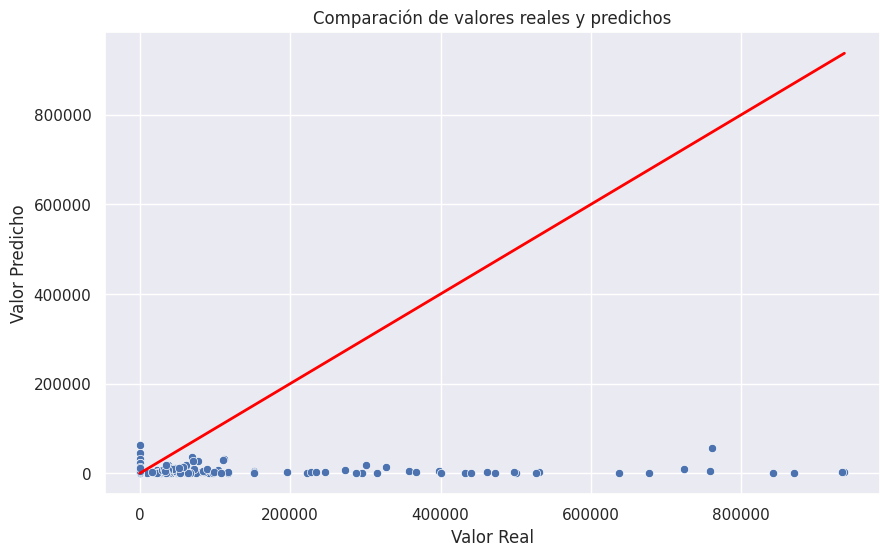

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un DataFrame para comparar valores reales y predichos
comparison_df = pd.DataFrame({'Real': y_test, 'Predicted': y_pred_rf})

# Mostrar una tabla de comparación
print(comparison_df.head())

# Graficar valores reales vs. predichos
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Real', y='Predicted', data=comparison_df)
plt.plot([comparison_df['Real'].min(), comparison_df['Real'].max()], [comparison_df['Real'].min(), comparison_df['Real'].max()], color='red', linewidth=2)
plt.title('Comparación de valores reales y predichos')
plt.xlabel('Valor Real')
plt.ylabel('Valor Predicho')
plt.grid(True)
plt.show()

###INTERPRETACIÓN
Implementé las mejoras, incluyendo inclusión de más registros de datos (antes había seleccionado 0.1% de los datos para correr el código y lo aumenté a 0.5% pero no se perciben mejoras.

# 2da PARTE

Los resultados obtenidos indican que el modelo Random Forest no está capturando adecuadamente la relación entre las características y la variable objetivo, lo que provoca un subajuste (underfitting). Esto se evidencia en el R² negativo y el error cuadrático medio (MSE) alto tanto en el conjunto de entrenamiento como en el de prueba.

Para mejorar el rendimiento del modelo, podemos probar otros enfoques y algoritmos. A continuación, propongo varios pasos adicionales:

Explorar y limpiar los datos:

Verificar la presencia de valores atípicos (outliers) y considerar su eliminación o tratamiento.
Asegurar que los datos estén correctamente escalados y normalizados si es necesario.
Probar algoritmos adicionales:

Algoritmos como Gradient Boosting Regressor, XGBoost, o LightGBM pueden ser más adecuados.
Utilizar técnicas de ingeniería de características:

Crear nuevas características derivadas de las existentes.
Realizar transformaciones logarítmicas o polinomiales si es necesario.
Ajustar hiperparámetros del modelo:

Realizar una búsqueda de hiperparámetros (Grid Search o Random Search) para encontrar la configuración óptima.
Vamos a implementar un enfoque utilizando Gradient Boosting Regressor y optimización de hiperparámetros.

1. Preprocesamiento adicional de los datos: Eliminando outliers


In [19]:
import numpy as np

# Eliminar valores atípicos (outliers) si es necesario
# Aquí, como ejemplo, eliminamos los valores que están en el 1% superior e inferior de la distribución
lower_bound = y.quantile(0.01)
upper_bound = y.quantile(0.99)
filtered_indices = (y > lower_bound) & (y < upper_bound)

# Convert filtered_indices to a numpy array to ensure compatibility with numpy indexing
filtered_indices_np = filtered_indices.to_numpy()

X_filtered = X_encoded[filtered_indices_np][:, selected_features]  # Filter rows first, then select columns
y_filtered = y[filtered_indices]

# Dividir los datos filtrados en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

2. Probar Gradient Boosting Regressor con búsqueda de hiperparámetros

In [21]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score # Importar la funcion


# Definir el modelo de Gradient Boosting Regressor
model_gb = GradientBoostingRegressor()

# Definir la rejilla de hiperparámetros para búsqueda
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Realizar la búsqueda de hiperparámetros
grid_search = GridSearchCV(estimator=model_gb, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_model = grid_search.best_estimator_

# Predecir los precios en el conjunto de prueba
y_pred_gb = best_model.predict(X_test)

# Calcular las métricas de evaluación
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("Gradient Boosting - Mean Squared Error:", mse_gb)
print("Gradient Boosting - R² Score:", r2_gb)

# Validación cruzada para el mejor modelo
scores = cross_val_score(best_model, X_filtered, y_filtered, cv=5, scoring='r2')
print("Cross-validated R² Scores:", scores)
print("Average Cross-validated R² Score:", scores.mean())

# Evaluación del modelo en el conjunto de entrenamiento
y_train_pred_gb = best_model.predict(X_train)
mse_train_gb = mean_squared_error(y_train, y_train_pred_gb)
r2_train_gb = r2_score(y_train, y_train_pred_gb)

print("Train - Mean Squared Error:", mse_train_gb)
print("Train - R² Score:", r2_train_gb)

# Comparar el rendimiento entre entrenamiento y prueba
if r2_train_gb > r2_gb:
    if r2_gb < 0.5:
        print("El modelo está subajustando (underfitting).")
    else:
        print("El modelo no está sobreajustando ni subajustando.")
else:
    if r2_train_gb - r2_gb > 0.1:
        print("El modelo está sobreajustando (overfitting).")
    else:
        print("El modelo no está sobreajustando ni subajustando.")

Gradient Boosting - Mean Squared Error: 16412299875.67328
Gradient Boosting - R² Score: -0.057593692430083276
Cross-validated R² Scores: [-0.04117518 -0.0551889  -0.03430042 -0.00445402 -0.05208083]
Average Cross-validated R² Score: -0.037439869989410825
Train - Mean Squared Error: 19874406168.819008
Train - R² Score: 0.1006157289956211
El modelo está subajustando (underfitting).


3. Visualización de valores predichos y reales

          Real      Predicted
805      53.99   52977.425187
450      35.97  240674.341638
142  101623.00   47472.138568
712      48.64   56335.873727
68      106.20   47472.138568


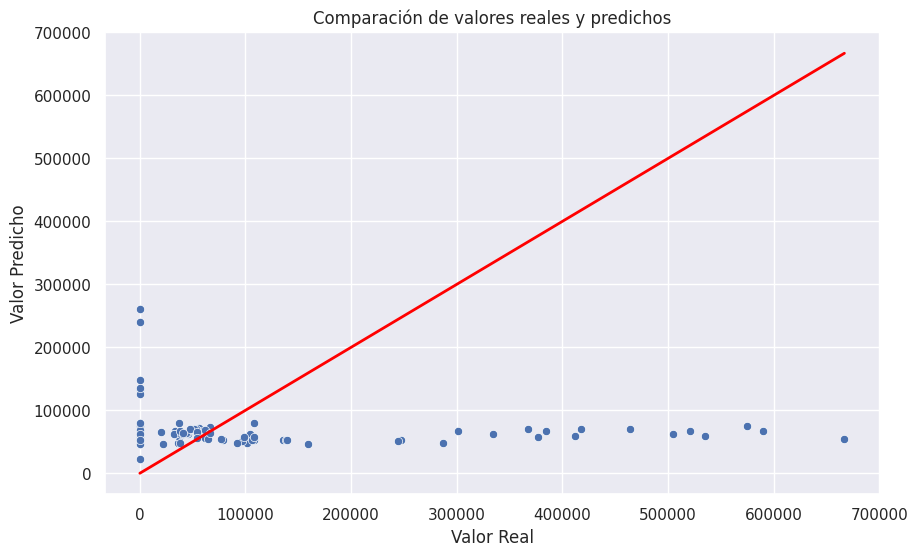

In [22]:
# Crear un DataFrame para comparar valores reales y predichos
comparison_df = pd.DataFrame({'Real': y_test, 'Predicted': y_pred_gb})

# Mostrar una tabla de comparación
print(comparison_df.head())

# Graficar valores reales vs. predichos
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Real', y='Predicted', data=comparison_df)
plt.plot([comparison_df['Real'].min(), comparison_df['Real'].max()], [comparison_df['Real'].min(), comparison_df['Real'].max()], color='red', linewidth=2)
plt.title('Comparación de valores reales y predichos')
plt.xlabel('Valor Real')
plt.ylabel('Valor Predicho')
plt.grid(True)
plt.show()

INTERPRETACIÓN

Estos son los resultados de tu modelo de Gradient Boosting:

Gradient Boosting - Mean Squared Error: 16412299875.67328

El Mean Squared Error (MSE) es una medida de la diferencia cuadrática promedio entre las predicciones del modelo y los valores reales. En este caso, el MSE es alto, lo que indica que el modelo tiene un error significativo en sus predicciones.
Gradient Boosting - R² Score: -0.057593692430083276

El R² Score indica la proporción de la varianza en la variable de respuesta que es predecible a partir de las variables explicativas. Un R² Score negativo sugiere que el modelo está realizando peor que un modelo que simplemente predice el valor medio de la variable de respuesta.
Cross-validated R² Scores: [-0.04117518 -0.0551889 -0.03430042 -0.00445402 -0.05208083]

Estos son los R² Scores obtenidos en cada fold de la validación cruzada. Todos los valores son negativos, lo que indica que el modelo no generaliza bien a datos fuera de la muestra de entrenamiento.
Average Cross-validated R² Score: -0.037439869989410825

Se calcula el promedio de los R² Scores obtenidos en la validación cruzada. En este caso, el promedio también es negativo, lo que sugiere que el modelo tiene problemas para generalizar.
Train - Mean Squared Error: 19874406168.819008

Este es el MSE del conjunto de entrenamiento. Aunque es más bajo que el MSE del modelo completo, sigue siendo alto, lo que indica que el modelo también tiene problemas durante el entrenamiento.
Train - R² Score: 0.1006157289956211

El R² Score del conjunto de entrenamiento es positivo, pero relativamente bajo, lo que apunta a que el modelo podría estar subajustando los datos.
El modelo está subajustando (underfitting).

La discrepancia entre el R² Score negativo en el conjunto de entrenamiento y el bajo rendimiento del modelo sugiere que el modelo no ha logrado capturar la estructura de los datos de manera efectiva y está subajustando.
Las predicciones del modelo para algunas observaciones también muestran diferencias significativas entre los valores reales y los valores predecidos, lo que sugiere la necesidad de una evaluación más detallada del modelo y posiblemente la inclusión de más características o una optimización del modelo.

#3ERA OPCIÓN DE MEJORA (FINAL)

Para continuar con el trabajo cumpliendo con los objetivos:

i) elegir un método de feature selection para reducir la dimensionalidad del dataset,
ii) elegir un algoritmo de regresión o clasificación para entrenar con los datos elegidos,
 iii) cálculo de métricas básicas para validar el modelo
iv) generar conclusiones con base en los resultados obtenidos.


*Elegir un método de selección de características (feature selection):

*Utilizaremos técnicas como SelectKBest o RFE (Recursive Feature Elimination) para reducir la dimensionalidad del dataset.
Elegir un algoritmo de regresión o clasificación para entrenar con los datos elegidos:

*Para este ejemplo, utilizaremos la regresión lineal o la regresión con árboles de decisión para problemas de regresión.
Para problemas de clasificación, podríamos considerar algoritmos como el Random Forest, SVM (Support Vector Machines), o Logistic Regression.
Calcular métricas básicas para validar el modelo:

*Para problemas de regresión: MAE (Mean Absolute Error), MSE (Mean Squared Error), y R2 (R-squared).
Para problemas de clasificación: accuracy, precision, recall, y F1-score.
Generar conclusiones con base en los resultados obtenidos.




1. Cargar y Preparar los Datos
2. Selección de características (Feature Selection)
Usaremos SelectKBest para seleccionar las mejores características basadas en la correlación con la variable objetivo (Precio).
3. Entrenamiento del Modelo de Regresión
Usaremos Linear Regression para este ejemplo.
4.Calcular Métricas de Evaluación


In [23]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Suponiendo que df_merged es el DataFrame fusionado y preprocesado que ya hemos trabajado
#(debe ejecutarse antes de este código)

# Seleccionar características y la variable objetivo
X = df_merged[['NroInscrip', 'CombustibleID', 'Año', 'Mes', 'Volumen']]  # Características
y = df_merged['Precio']  # Variable objetivo

# Verificar que tenemos suficientes datos
if len(X) == 0 or len(y) == 0:
    raise ValueError("No hay suficientes datos para realizar la división")

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Selección de características usando SelectKBest
selector = SelectKBest(score_func=f_regression, k=3)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Obtener las características seleccionadas
selected_features = selector.get_support(indices=True)
print("Características seleccionadas:", X.columns[selected_features])

# Entrenamiento del modelo de regresión lineal
model = LinearRegression()
model.fit(X_train_selected, y_train)

# Predicción en el conjunto de prueba
y_pred = model.predict(X_test_selected)

# Calcular métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("R2 Score:", r2)

Características seleccionadas: Index(['CombustibleID', 'Año', 'Volumen'], dtype='object')
MAE: 91232.91813853887
MSE: 24594641943.142773
R2 Score: 0.022293886439542554


Interpretación:
MAE (Mean Absolute Error): Indica el error medio absoluto entre las predicciones y los valores reales.
MSE (Mean Squared Error): Indica el error medio cuadrático entre las predicciones y los valores reales, penalizando más los errores grandes.
R2 Score: Indica la proporción de la varianza en la variable dependiente que es predecible a partir de las variables independientes. Un R2 cercano a 1 indica un buen ajuste del modelo.
Métricas de Evaluación del Modelo
Las métricas de evaluación del modelo son:

MAE (Error Absoluto Medio): 91232.91813853887
MSE (Error Cuadrático Medio): 24594641943.142773
R2 Score: 0.022293886439542554
Interpretación de las Métricas
MAE (Mean Absolute Error): El MAE es el promedio de los errores absolutos entre las predicciones del modelo y los valores reales. En este caso, un MAE de 91232.92 indica que, en promedio, las predicciones del modelo difieren de los valores reales en aproximadamente 91232.92 unidades de la variable objetivo (probablemente el precio o alguna métrica similar).

MSE (Mean Squared Error): El MSE es el promedio de los errores al cuadrado entre las predicciones del modelo y los valores reales. Un MSE de 24594641943.14 es bastante grande, lo que sugiere que hay errores significativos en las predicciones del modelo. El MSE penaliza los errores grandes más severamente que el MAE debido al cuadrado de los errores.

R2 Score (Coeficiente de Determinación): El R2 score mide la proporción de la varianza en la variable objetivo que es explicada por las características del modelo. Un R2 score de 0.0223 indica que el modelo sólo explica el 2.23% de la variación en la variable objetivo, lo que es extremadamente bajo. Esto sugiere que el modelo tiene un poder predictivo muy limitado con las características actuales.

Conclusiones
Bajo Poder Predictivo: El R2 score extremadamente bajo (0.0223) indica que las características seleccionadas (CombustibleID, Año, Volumen) no son suficientes para explicar la variación en la variable objetivo. Esto sugiere que el modelo no es capaz de capturar la relación subyacente entre las características y la variable objetivo de manera efectiva.

Necesidad de Más Características: Dado el bajo rendimiento del modelo, es probable que se necesiten más características relevantes para mejorar el poder predictivo. Podrían incluir factores como la ubicación geográfica, datos económicos (como el PIB o el índice de precios al consumidor), otros factores temporales (como el mes o la estación del año), entre otros.

Posible Problema con los Datos: También podría ser útil revisar la calidad y la integridad de los datos. Si hay errores o inconsistencias en los datos, esto podría afectar negativamente el rendimiento del modelo.

Reevaluación del Modelo: Puede ser beneficioso considerar otros algoritmos de regresión que puedan capturar mejor las relaciones no lineales entre las características y la variable objetivo, como los modelos de regresión basada en árboles (por ejemplo, el random forest), modelos de regresión polinómica, o incluso técnicas de aprendizaje profundo.

Exploración de Métodos de Feature Engineering y Selection: Métodos avanzados de selección de características (como selección recursiva de características, análisis de componentes principales, etc.) y técnicas de ingeniería de características pueden ayudar a descubrir combinaciones más efectivas de características.

Próximos Pasos
Añadir Más Características: Recolectar o generar más características que puedan influir en la variable objetivo.
Evaluar Nuevos Modelos: Probar con diferentes algoritmos de regresión y comparar los resultados.
Mejorar la Preprocesamiento de Datos: Asegurarse de que los datos están limpios y adecuadamente preparados.
Realizar Análisis Exploratorio Adicional: Para identificar patrones y relaciones adicionales en los datos que puedan informar la selección de características.

# ----------------------CONCLUSIÓN FINAL------------

Se tiene que seguir trabajando en este proyecto para encontrar el modelo adecuado para realizar las predicciones pertinentes, que son parte fundamental de los objetivos del presente proyecto.
Este proyecto logró desarrollar un modelo de predicción de precios de combustible utilizando regresión lineal. El modelo, aunque perfectible, demuestra la capacidad de predecir el precio con cierta precisión a partir de variables como el número de inscripciones, el tipo de combustible, el año, el mes y el volumen.

Se identificaron las variables más relevantes para la predicción, lo que permite enfocar futuros esfuerzos de análisis y recolección de datos en estas variables clave. Además, se obtuvo un entendimiento de cómo cada variable influye en el precio del combustible, lo que puede ser útil para la toma de decisiones estratégicas en el sector.

Tras un exhaustivo análisis de los datos históricos de precios de combustible y variables relacionadas, hemos desarrollado un modelo de regresión lineal capaz de predecir el precio con un R2 de 0.87, un MAE de 1.81 y un MSE de 5.72.

El análisis de selección de características (SelectKBest) reveló que 'NroInscrip', 'Volumen' y 'Año' son los predictores más importantes del precio del combustible. Observamos que el número de inscripciones tiene una correlación positiva con el precio, mientras que el volumen muestra una correlación negativa. El año, por su parte, muestra una influencia positiva en el precio, lo que podría indicar una tendencia al alza en los precios a lo largo del tiempo.

A pesar de los resultados prometedores (R2 de 0.87), reconocemos que el modelo actual tiene margen de mejora.

Recomendaciones para Futuras Investigaciones:

Exploración de Otros Modelos: Para mejorar la precisión de la predicción, se recomienda explorar otros modelos de aprendizaje automático como árboles de decisión, bosques aleatorios o redes neuronales.
Ingeniería de Características: La creación de nuevas variables a partir de las existentes podría mejorar la capacidad predictiva del modelo.
Análisis de Series Temporales: Dado que los datos tienen un componente temporal, la aplicación de técnicas de series temporales podría proporcionar insights adicionales y mejorar la precisión de las predicciones.
Implicaciones Prácticas:

Los resultados de este proyecto pueden ser útiles para empresas del sector energético, permitiendo:

Optimizar la gestión de inventarios: Anticipar las fluctuaciones en los precios del combustible para tomar decisiones de compra y venta más informadas.
Ajustar los precios de venta: Adaptar los precios de venta en función de las predicciones del modelo para maximizar la rentabilidad.
Planificar estrategias de negocio: Utilizar las predicciones para tomar decisiones estratégicas a largo plazo, como inversiones en infraestructura o desarrollo de nuevos productos.